Submitter Details:  
Yarden Dahan, 208730523  
[My Kaggle Link](https://www.kaggle.com/jordandahan)

In [1]:
#import numpy,matlplotlib,etc.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn

from IPython.display import display, Markdown
import math
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import plotly.express as px
import seaborn as sns 
# from dataprep.eda import create_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#for AutoComplete
%config Completer.use_jedi = False


> # **TITANIC-CHALLENGE**
![picture](https://drive.google.com//uc?export=view&id=16sJxE9ISnk0RP1LR7XjX8xbZPioc9w8J)



># 1. Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history.  
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.  
While there was some element of luck involved in surviving, **it seems some groups of people were more likely to survive than others.**    
***The ultimate goal:***  
Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

> # 2. **A quick and general look at the data**
The features are:  
![picture](https://drive.google.com//uc?export=view&id=1ZgxiFAe2CSyRM7eOdHpkk6vjg5l_dD64)


## Important notes:  
***pclass***:  
mean the Socio-economic level: 
1 = High,2 = Middle, 3 = Low  

***sibsp:***
The dataset defines family relations in this way...  
* Sibling = brother, sister, stepbrother, stepsister  
* Spouse = husband, wife (mistresses and fiancés were ignored)  
  
***parch:***
The dataset defines family relations in this way...  
* Parent = mother, father  
* Child = daughter, son, stepdaughter, stepson  
* Some children travelled only with a nanny, therefore parch=0 for them.  

### pclass:  
* First class = white, Second class = yellow ,Third = pink
![picture](https://drive.google.com//uc?export=view&id=1YExuY_v_xkE02sIlg-pWduUVZ-NfvEsc)


## Load Data

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv('../input/titanic/test.csv')
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
print(train_data['Survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> # ***3.Preprocessing & Data Cleaning***

> **We will now want to prepare the data in terms of row arrangement and indexes.**   
> Focus on:  
>* Delete data duplicated.
>* Checking for Nan values.
>* Drop outlier.
>* Drop unrelated values.

>### Drop unrelated values.  
 

In [7]:
display(train_data['Name'])
display(train_data['Ticket'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [8]:
train_data.drop(columns=['Name','Ticket'],axis=1,inplace=True)
test_df.drop(columns=['Name','Ticket'],axis=1,inplace=True)

>### Delete data duplicated.  
First we will check if there are duplicate data  


In [9]:
duplicate_data = train_data.duplicated()
print(duplicate_data.sum())

duplicate_data = test_df.duplicated()
print(duplicate_data.sum())

0
0


>No removal is required because there is no duplicate data.  
>### checking for Nan values

In [10]:
display(train_data.isna().any()) #say if there is nan in x column,(any do OR)
display(test_df.isna().any())

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Cabin           True
Embarked        True
dtype: bool

PassengerId    False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare            True
Cabin           True
Embarked       False
dtype: bool

**As we can see we have NaN values in the columns (train data):**  
` Age, Cabin, Embarked `   
**we have NaN values in the columns (test data):**  
`Age, Cabin, Fare`
Next, let's see how many we have in each column.
* note:  there is a difference between train and test data.

In [11]:
# get the number of missing data points per column
missing_values_count = train_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:12]

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

>we have 891 rows, it's seem like Cabin have alot of NaN values.  
Next, display the percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

<BarContainer object of 10 artists>

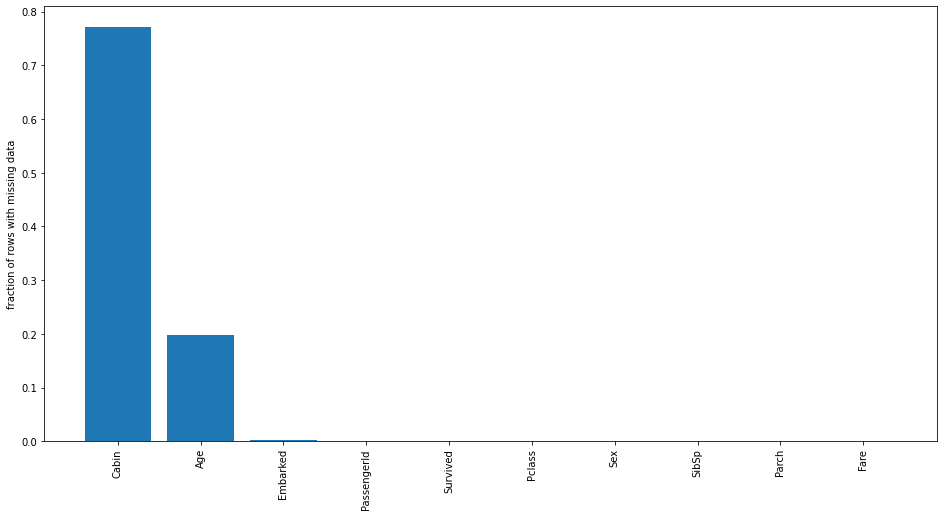

In [12]:
#AVG of # NaN 
nan_counts = train_data.isna().sum().sort_values(ascending = False)/len(train_data)
#Setting size of plot 
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(nan_counts)),nan_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
#show nan values at bar-plot
plt.bar(np.arange(len(nan_counts)),nan_counts)



In [13]:
total_cells = np.product(train_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f'NaN data : {percent_missing} %')

NaN data : 9.719416386083052 %


#### **Filling in missing values**  
First, I'll drop cabin column because it has above 70% of missing values.  
Next, I'll fill all the missing values in other columns imputation method--> to maintain distribution for each feature.  
( For each column, that have less than half of the entries are missing. Thus, dropping the columns removes a lot of useful information, and so it makes sense that imputation would perform better.)  

* note: Any final change in training data will also be made to test data

In [14]:
def fill_random_value_imputation(feature,data):
    sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=sample

,NaN Values,Percentage NaN Values
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

<BarContainer object of 9 artists>

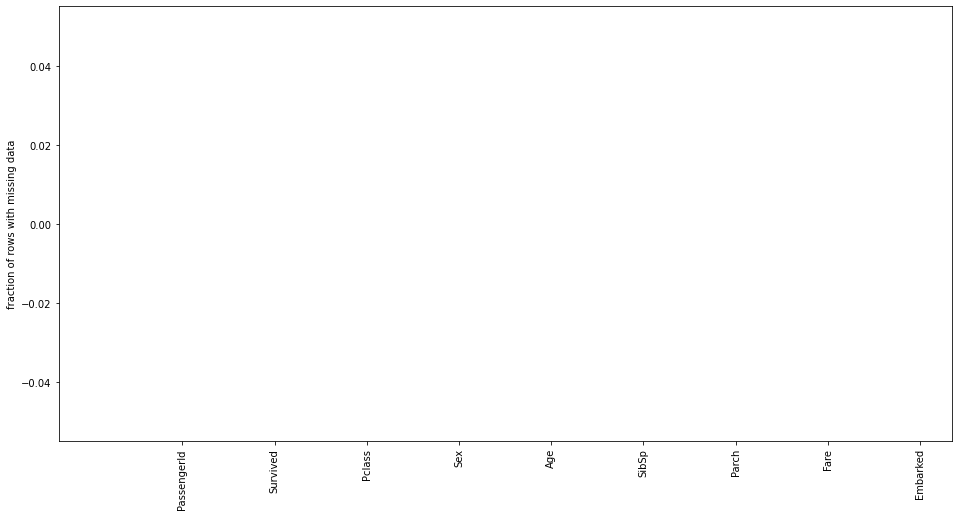

In [15]:
#-----------------------------------------Train data----------------------------------------------------
train_data.drop(['Cabin'],axis=1,inplace = True)
train_data.head()
for col in train_data:
    fill_random_value_imputation(col,train_data)
null_info = pd.DataFrame({'NaN Values' : train_data.isna().sum().sort_values(ascending=False), 'Percentage NaN Values' : (train_data.isna().sum().sort_values(ascending=False)) / (train_data.shape[0]) * (100)})
display(null_info)
display(train_data.isna().any()) 

#AVG of # NaN 
nan_counts = train_data.isna().sum().sort_values(ascending = False)/len(train_data)
#Setting size of plot 
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(nan_counts))+0.5,nan_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
#show nan values at bar-plot
plt.bar(np.arange(len(nan_counts)),nan_counts)

In [16]:
#-----------------------------------------Test data----------------------------------------------------
test_df.drop(['Cabin'],axis=1,inplace = True)
test_df.head()
for col in test_df:
    fill_random_value_imputation(col,test_df)
null_info = pd.DataFrame({'NaN Values' : test_df.isna().sum().sort_values(ascending=False), 'Percentage NaN Values' : (test_df.isna().sum().sort_values(ascending=False)) / (test_df.shape[0]) * (100)})
display(null_info)
display(test_df.isna().any())

,NaN Values,Percentage NaN Values
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

## *convert data to numeric values*

**step 1: Get list of categorical variables**


*Check the types of the features:*

In [17]:
print(f'train.dtypes:\n {train_data.dtypes}\n\ntest.dtypes:\n {test_df.dtypes}')

train.dtypes:
 PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

test.dtypes:
 PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object


> **As we can see- we need to change 'Sex','Embarked' to numeric values.**  
note: The object dtype indicates a column has text 

In [18]:
categorial_list = (train_data.dtypes == 'object')
object_cols = list(categorial_list[categorial_list].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sex', 'Embarked']


**step 2: One Hot Encoding**  
* 'Sex' encoding:  
    * 'Male' = 1.0  
    * 'Female' = 0.0  
* 'Embarked' encoding:  
    * Q = 1.0,0.0   
    * S = 0.0,1.0  
    * C = 0.0,0.0

In [19]:
#-----------------------------------------------------------------Train data-------------------------------------------------------------
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder( sparse=False,drop = 'first')
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_data[object_cols]),columns = OH_encoder.get_feature_names())

# One-hot encoding removed index; put it back
OH_cols_train.index = train_data.index

# Remove categorical columns (will replace with one-hot encoding)
num_train_data = train_data.drop(object_cols, axis=1)
OH_cols_train = OH_cols_train.set_axis(['Sex', 'Embarked_Q', 'Embarked_S'], axis=1)
# Add one-hot encoded columns to numerical features
OH_train_data = pd.concat([num_train_data, OH_cols_train], axis=1)
OH_train_data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0
888,889,0,3,31.0,1,2,23.4500,0.0,0.0,1.0
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0


In [20]:
#-----------------------------------------------------------------Test data-------------------------------------------------------------
OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(test_df[object_cols]),columns = OH_encoder.get_feature_names())

# One-hot encoding removed index; put it back
OH_cols_test.index = test_df.index

# Remove categorical columns (will replace with one-hot encoding)
num_test_data = test_df.drop(object_cols, axis=1)
OH_cols_test = OH_cols_test.set_axis(['Sex', 'Embarked_Q', 'Embarked_S'], axis=1)
# Add one-hot encoded columns to numerical features
OH_test_data = pd.concat([num_test_data, OH_cols_test], axis=1)
OH_test_data


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,894,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,895,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,21.0,0,0,8.0500,1.0,0.0,1.0
414,1306,1,39.0,0,0,108.9000,0.0,0.0,0.0
415,1307,3,38.5,0,0,7.2500,1.0,0.0,1.0
416,1308,3,21.0,0,0,8.0500,1.0,0.0,1.0


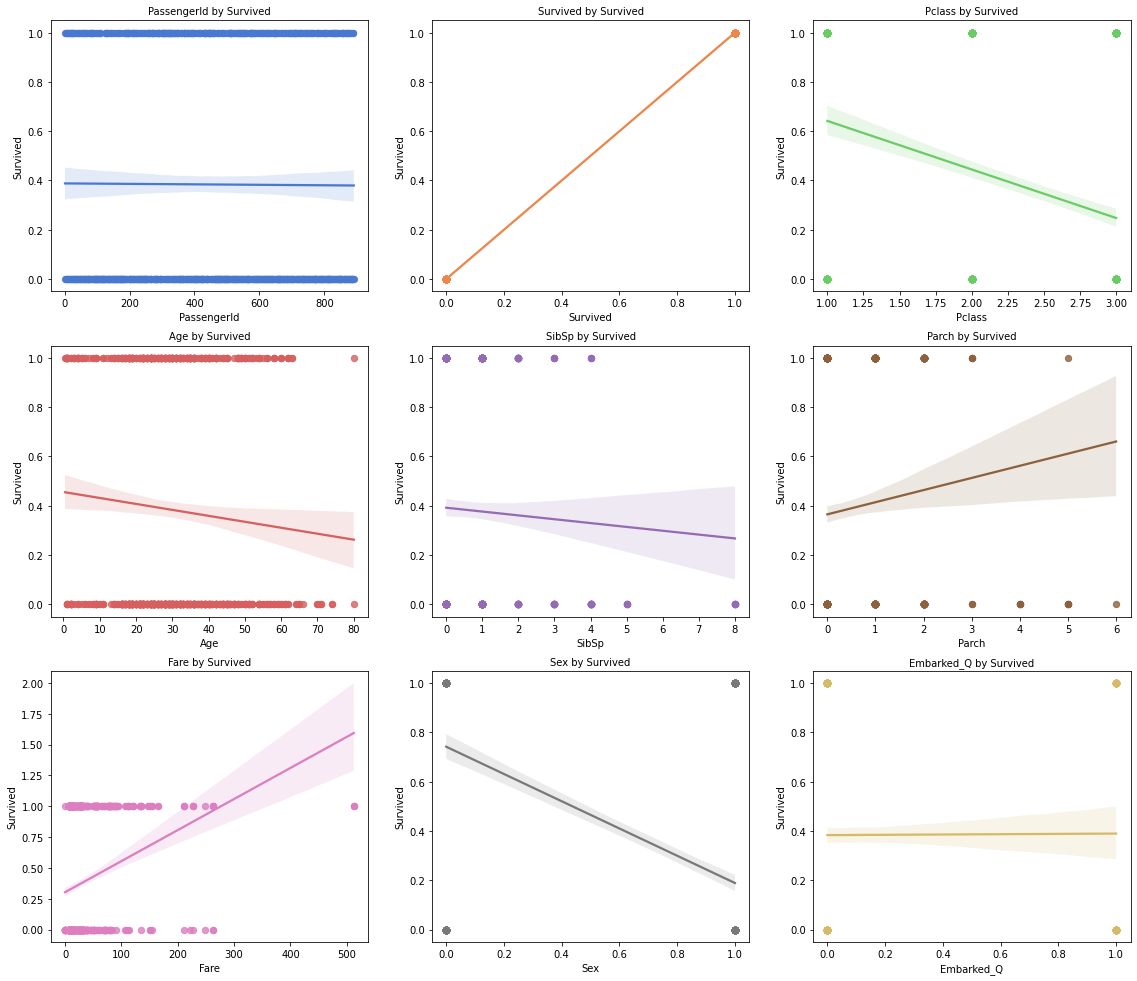

In [21]:
# get color map
def get_sns_cmap(n, name='muted'):
    return sns.color_palette(palette=name, n_colors=n)

# plot with regression line target values by each feature
def plot_reg_target_values_by_each_feature(df, target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=3.2, bottom=0, left=0, right=2.5)
    colors = get_sns_cmap(len(df.columns))
  
    for i in range(len(df.columns)-1):
        ax = sns.regplot(x=df.columns[i], y=target_column_name, data=df, color=colors[i], ax=axes[i//nrows, i%nrows], scatter_kws={"s": 40})
        ax.set_title(label=f'{df.columns[i]} by {target_column_name}', fontsize=10)
   
    for i in range(len(df.columns)-1, nrows*ncols):
        fig.delaxes(axes.flatten()[i])

plot_reg_target_values_by_each_feature(OH_train_data, 'Survived')


**note: As you can see presenting the data using regplot does not give us too much information because there are 2 options -  
survived or not survived, so we chose to display the data using barplot.**  
> ### **note:From the centralization of the values it can be seen that the following features should be classified into groups:Age, Fare.**   
In addition, passenger ID is irrelevant for train_data
## Classification of ages into categories:   
* Infants = (0,3] --> encoded as 1.0 
* Children = (3,16] --> encoded as 0.0
* Young Adults = (16,30]--> encoded as 4.0 
* Middle-Aged Adults = (30,45]--> encoded as 2.0 
* Old Adults = (45,90] -->encoded as 3.0

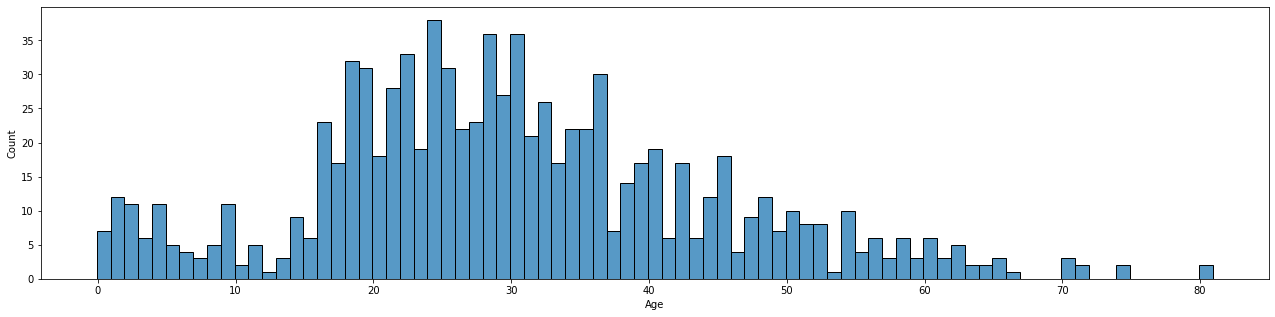

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroup
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,Young Adults
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,Middle-Aged Adults
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,Young Adults
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,Middle-Aged Adults
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,Middle-Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0,Later Young Adulys
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,Young Adults
888,889,0,3,31.0,1,2,23.4500,0.0,0.0,1.0,Later Young Adulys
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,Young Adults


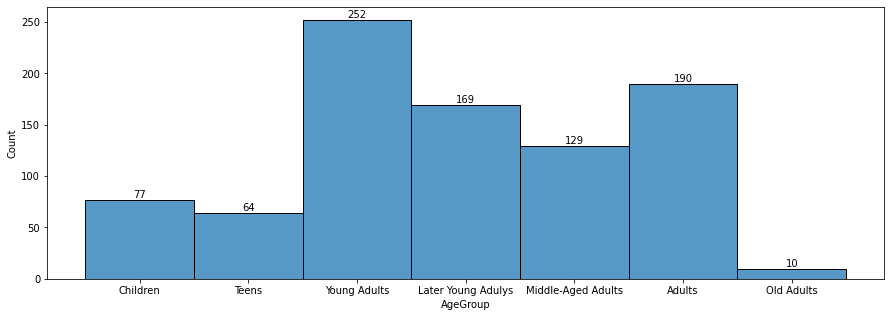

In [22]:
plt.subplots(figsize=(22, 5))
sns.histplot(data=OH_train_data["Age"],discrete = True,binwidth=15)
plt.show()
# age_range_bins= [0,3,16,30,45,90]
age_range_bins= [0,11,18,27,33,40,66,90]
# 0-11: Children, 11-18:
# labels = ['Infant','Children','Young Adults','Middle-Aged Adults','Old Adults']
labels = ['Children','Teens','Young Adults','Later Young Adulys','Middle-Aged Adults','Adults','Old Adults']


OH_train_data['AgeGroup'] = pd.cut(OH_train_data['Age'], bins=age_range_bins, labels=labels, right=False)
display(OH_train_data)
plt.subplots(figsize=(15, 5))
ax = sns.histplot(data=OH_train_data["AgeGroup"],discrete = True,binwidth=5)
for container in ax.containers:
    ax.bar_label(container)
plt.show()


### Conclusions:  
* **Age distribution:**  
    * High concentration is in the 16-30 age category (Young Adults).
    * It can be seen that the old adults category is higher than the sum of the categories - Infant & children.
    
### ***I'll use ordinal enoder for AgeGroup category:***
#### Encoding age fearue:  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroup,AgeGroupEncoding
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,Young Adults,6.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,Middle-Aged Adults,3.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,Young Adults,6.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,Middle-Aged Adults,3.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,Middle-Aged Adults,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0,Later Young Adulys,2.0
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,Young Adults,6.0
888,889,0,3,31.0,1,2,23.4500,0.0,0.0,1.0,Later Young Adulys,2.0
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,Young Adults,6.0


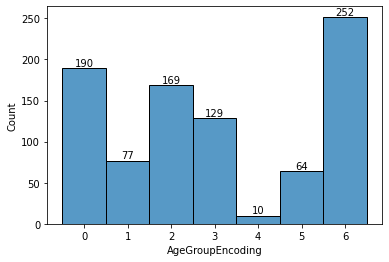

Age                      2.0
AgeGroup            Children
AgeGroupEncoding         1.0
Name: 7, dtype: object

In [23]:
#-----------------------------------------------------------------Train data-------------------------------------------------------------
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = pd.DataFrame(encoder.fit_transform(OH_train_data[['AgeGroup']]))
result.rename(columns={0: "AgeGroupEncoding"},inplace=True)
result.index = OH_train_data.index
OH_train_data = pd.concat([OH_train_data, result], axis=1)

display(OH_train_data)
ax = sns.histplot(data=OH_train_data["AgeGroupEncoding"],discrete = True,binwidth=5)
for container in ax.containers:
    ax.bar_label(container)
plt.show()
OH_train_data[['Age','AgeGroup',	'AgeGroupEncoding']].loc[7]

In [24]:
#-----------------------------------------------------------------Test data-------------------------------------------------------------
OH_test_data['AgeGroup'] = pd.cut(OH_test_data['Age'], bins=age_range_bins, labels=labels, right=False)
# transform data
result = pd.DataFrame(encoder.fit_transform(OH_test_data[['AgeGroup']]))
result.rename(columns={0: "AgeGroupEncoding"},inplace=True)
result.index = OH_test_data.index
OH_test_data = pd.concat([OH_test_data, result], axis=1)
display(OH_test_data)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroup,AgeGroupEncoding
0,892,3,34.5,0,0,7.8292,1.0,1.0,0.0,Middle-Aged Adults,3.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0,Adults,0.0
2,894,2,62.0,0,0,9.6875,1.0,1.0,0.0,Adults,0.0
3,895,3,27.0,0,0,8.6625,1.0,0.0,1.0,Later Young Adulys,2.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0,Young Adults,6.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,21.0,0,0,8.0500,1.0,0.0,1.0,Young Adults,6.0
414,1306,1,39.0,0,0,108.9000,0.0,0.0,0.0,Middle-Aged Adults,3.0
415,1307,3,38.5,0,0,7.2500,1.0,0.0,1.0,Middle-Aged Adults,3.0
416,1308,3,21.0,0,0,8.0500,1.0,0.0,1.0,Young Adults,6.0


We will perform for column "Fare" the same process we performed for column "Age"


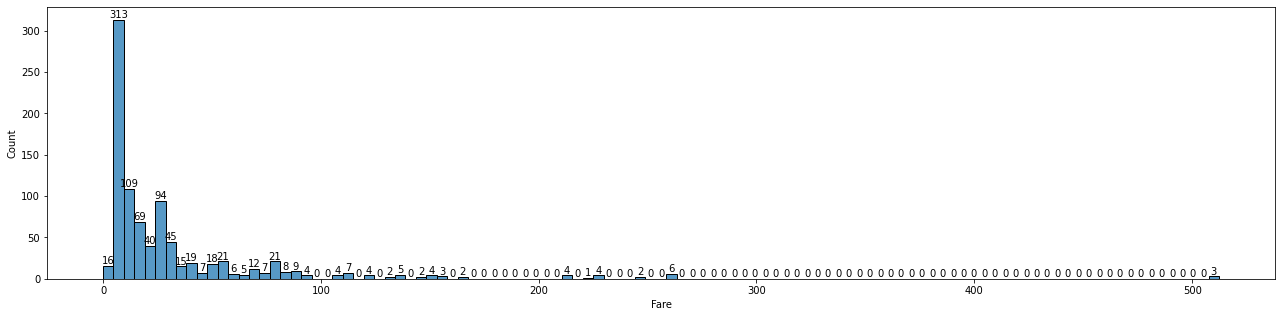

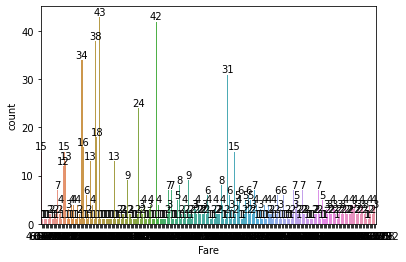

[  0.       7.8542  10.5     21.6792  39.6875 512.3292]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroup,AgeGroupEncoding,Fare_new,FareEncoding
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,Young Adults,6.0,"(-0.001, 7.854]",0.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,Middle-Aged Adults,3.0,"(39.688, 512.329]",4.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,Young Adults,6.0,"(7.854, 10.5]",1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,Middle-Aged Adults,3.0,"(39.688, 512.329]",4.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,Middle-Aged Adults,3.0,"(7.854, 10.5]",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0,Later Young Adulys,2.0,"(10.5, 21.679]",2.0
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,Young Adults,6.0,"(21.679, 39.688]",3.0
888,889,0,3,31.0,1,2,23.4500,0.0,0.0,1.0,Later Young Adulys,2.0,"(21.679, 39.688]",3.0
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,Young Adults,6.0,"(21.679, 39.688]",3.0


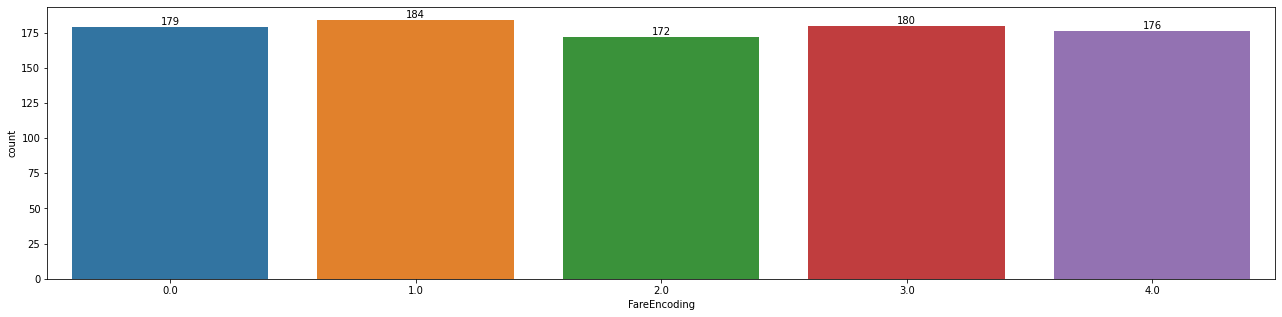

In [25]:
#-----------------------------------------------------------------Train data-------------------------------------------------------------
plt.subplots(figsize=(22, 5))
ax = sns.histplot(data=OH_train_data, x="Fare")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

ax = sns.countplot(data=OH_train_data, x="Fare")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#create rang fare
fare_range_bins = pd.qcut(OH_train_data['Fare'], q=5, retbins=True)[1]
print(fare_range_bins)
plt.subplots(figsize=(22, 5))
OH_train_data["Fare_new"] = pd.cut(OH_train_data['Fare'], bins=fare_range_bins, include_lowest=True)

#ordinal Encoding fare 
result = pd.DataFrame(encoder.fit_transform(OH_train_data[['Fare_new']]))
result.rename(columns={0: "FareEncoding"},inplace=True)
result.index = OH_train_data.index
OH_train_data = pd.concat([OH_train_data, result], axis=1)
display(OH_train_data)


ax = sns.countplot(data=OH_train_data, x="FareEncoding")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [26]:
#-----------------------------------------------------------------Test data-------------------------------------------------------------
#create range fare according train set
OH_test_data["Fare_new"] = pd.cut(OH_test_data['Fare'], bins=fare_range_bins, include_lowest=True)

#ordinal Encoding fare 
result = pd.DataFrame(encoder.fit_transform(OH_test_data[['Fare_new']]))
result.rename(columns={0: "FareEncoding"},inplace=True)
result.index = OH_test_data.index
OH_test_data = pd.concat([OH_test_data, result], axis=1)
display(OH_test_data)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroup,AgeGroupEncoding,Fare_new,FareEncoding
0,892,3,34.5,0,0,7.8292,1.0,1.0,0.0,Middle-Aged Adults,3.0,"(-0.001, 7.854]",0.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0,Adults,0.0,"(-0.001, 7.854]",0.0
2,894,2,62.0,0,0,9.6875,1.0,1.0,0.0,Adults,0.0,"(7.854, 10.5]",1.0
3,895,3,27.0,0,0,8.6625,1.0,0.0,1.0,Later Young Adulys,2.0,"(7.854, 10.5]",1.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0,Young Adults,6.0,"(10.5, 21.679]",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,21.0,0,0,8.0500,1.0,0.0,1.0,Young Adults,6.0,"(7.854, 10.5]",1.0
414,1306,1,39.0,0,0,108.9000,0.0,0.0,0.0,Middle-Aged Adults,3.0,"(39.688, 512.329]",4.0
415,1307,3,38.5,0,0,7.2500,1.0,0.0,1.0,Middle-Aged Adults,3.0,"(-0.001, 7.854]",0.0
416,1308,3,21.0,0,0,8.0500,1.0,0.0,1.0,Young Adults,6.0,"(7.854, 10.5]",1.0


> # **4.Data Investigation**

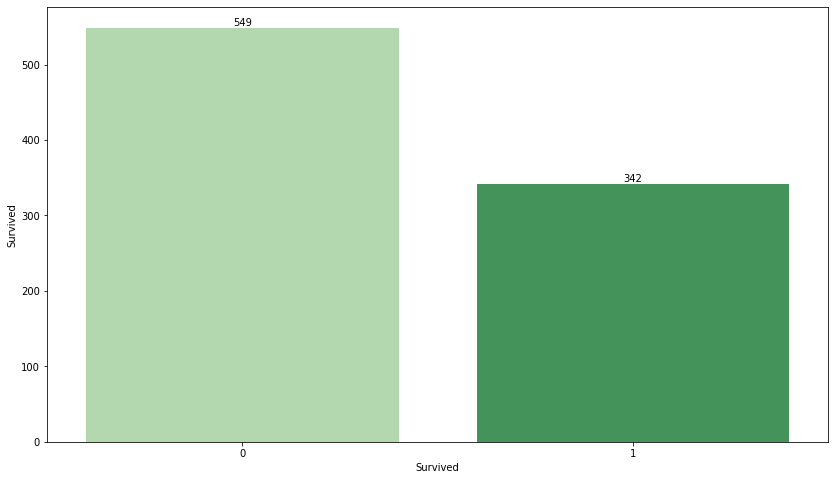

In [27]:
# Set the figure size
plt.figure(figsize=(14, 8))
train_data_cp = train_data.copy()
train_data_cp.drop(['Survived'],axis = 1,inplace = True)
target_data_cp = train_data['Survived'].copy()
# plot a bar chart
ax = sns.barplot(x=target_data_cp, y=target_data_cp.value_counts(), data=train_data_cp, estimator=np.mean, capsize=.2,palette="Greens")
for container in ax.containers:
    ax.bar_label(container)


> **As can be seen 342 of all people in train group (891) survived while 549 did not survive.**  
This is 38.38% percent survival

> ## *Analyze data and present them in an understandable way*  
**I will now introduce the connection between each feature and the chance of survival**

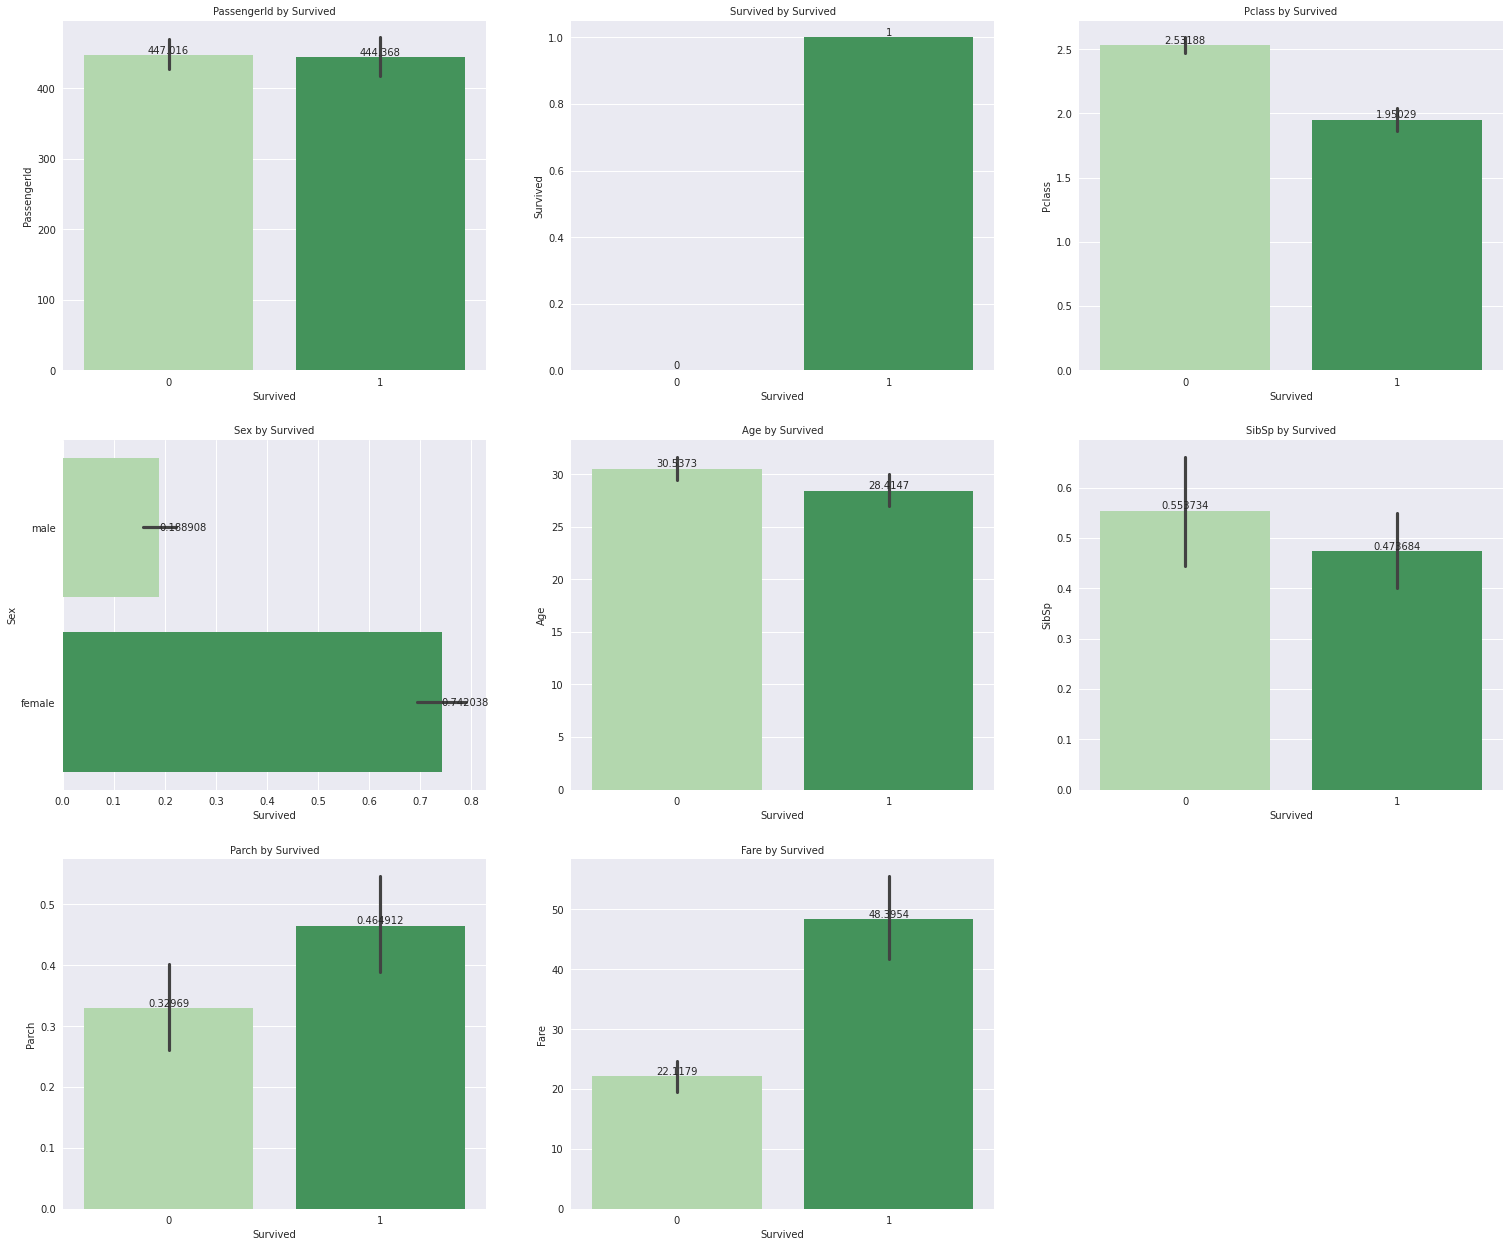

In [28]:
# get color map
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

# plot target values by each feature
def plot_target_values_by_each_feature(df, target_column,target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    plt.style.use('seaborn')
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=3, bottom=0, left=0, right=2.5)
    colors = get_cmap(len(df.columns))

    for i in range(len(df.columns)-1):
        ax = sns.barplot(x=target_column, y=df.columns[i],data = df,  ax=axes[i//nrows, i%nrows],palette="Greens")
        ax.set_title(f'{df.columns[i]} by {target_column_name}');
        for container in ax.containers:
            ax.bar_label(container)
        axes[i//nrows, i%nrows].tick_params(axis='both', labelsize=10)
        axes[i//nrows, i%nrows].xaxis.label.set_size(10)
        axes[i//nrows, i%nrows].yaxis.label.set_size(10)
        axes[i//nrows, i%nrows].title.set_fontsize(10)

    for i in range(len(df.columns)-1, nrows*ncols): 
        fig.delaxes(axes.flatten()[i]) # Flattening so we can access axes array as a 1-d array to delete unused axes objects

plot_target_values_by_each_feature(train_data, target_data_cp,'Survived')


> ### I will now see the correlation between each feature and feature

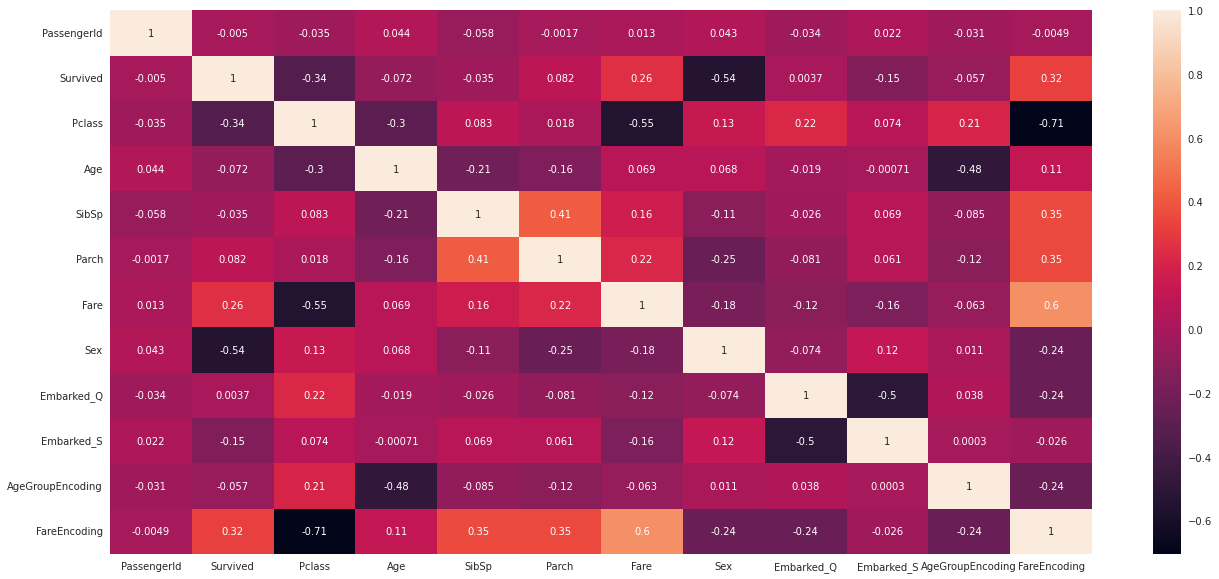

In [29]:
corrMatrix = OH_train_data.corr()

plt.subplots(figsize=(22, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

> ## Pclass
![picture](https://drive.google.com//uc?export=view&id=1YExuY_v_xkE02sIlg-pWduUVZ-NfvEsc)
* As I saw in the picture of the structure of the ship -  
  the location of the classes on the ship were found in different places for example a third class was at the stern of the ship.  
  I'll investigate the fact that a person is in a particular class against the chances of survival

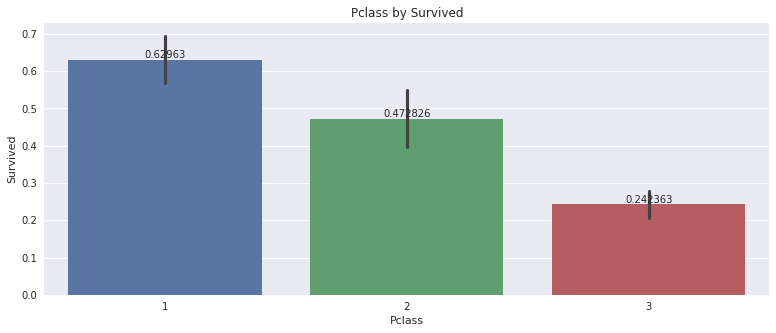

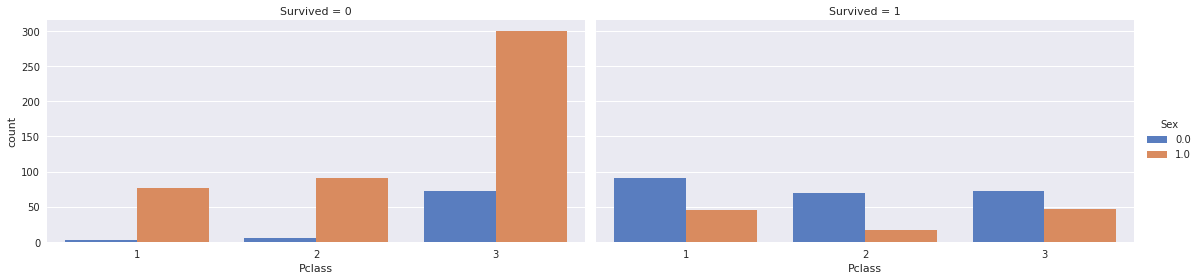

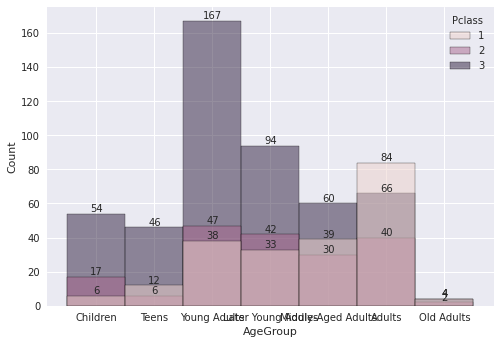

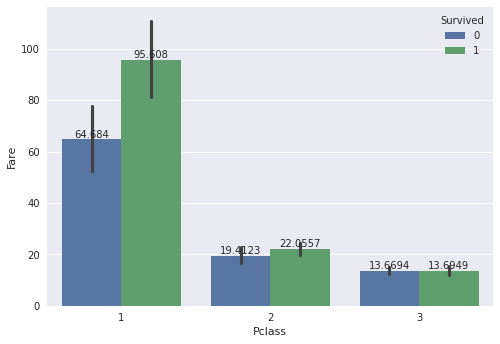

In [30]:
#------------------------------------------------------------------------PCLASS--------------------------------------------------------------------------------
# Probability of survival from each class
plt.subplots(figsize=(13, 5))
ax = sns.barplot(data=train_data, x='Pclass', y='Survived')
ax.set_title(f'Pclass by Survived');
for container in ax.containers:
    ax.bar_label(container)
plt.show()
#show amount of men vs women in pclass
ax = sns.catplot(data=OH_train_data, x='Pclass',  col="Survived",kind = 'count',hue = 'Sex',palette="muted", height=4, aspect=2)
plt.show()
#Concentrations of ages in class
ax = sns.histplot(data=OH_train_data, x="AgeGroup", hue="Pclass")
for container in ax.containers:
    ax.bar_label(container)
plt.show()
#expect - Expensive price = first class
ax = sns.barplot(data=OH_train_data, x="Pclass",y="Fare", hue="Survived")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### **Conclusions:**  
* If you are a Class 3 and a man - a high probability that you will not survive in the Titanic.
* If you are from Class 1 and a woman - there is a high probability that you will survive.
* In each class women survived more than men, and inversely men did not survive more than women.
* High concentration of young people in class 3 (perhaps because it is cheaper).


> ## Sex  
* As seen in the graphs for all the features:  
  The thing - that more women survived than men will be repeated. Here I will show only the chances of survival for each gender.
  I will put sex comparisons in all the graphs for the rest of the features (using hue).

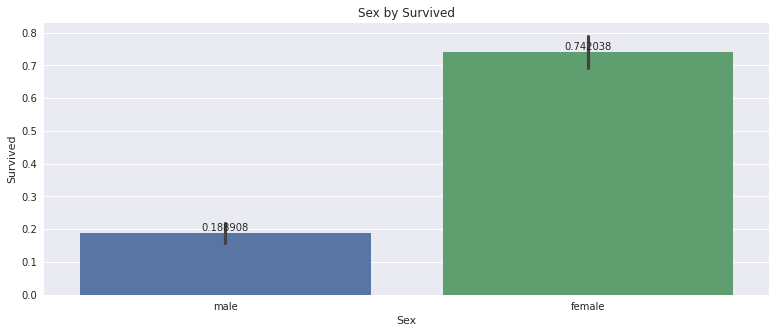

In [31]:
#------------------------------------------------------------------------Gender--------------------------------------------------------------------------------
plt.subplots(figsize=(13, 5))
ax = sns.barplot(data=train_data, x='Sex', y='Survived')
ax.set_title(f'Sex by Survived');
for container in ax.containers:
    ax.bar_label(container)
plt.show()

> ## Age  
* Here I will show only the chances of survival for each age group.
  I will put age comparisons in all the graphs for the rest of the features (using hue).

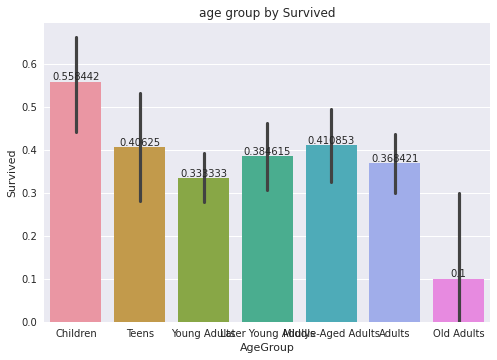

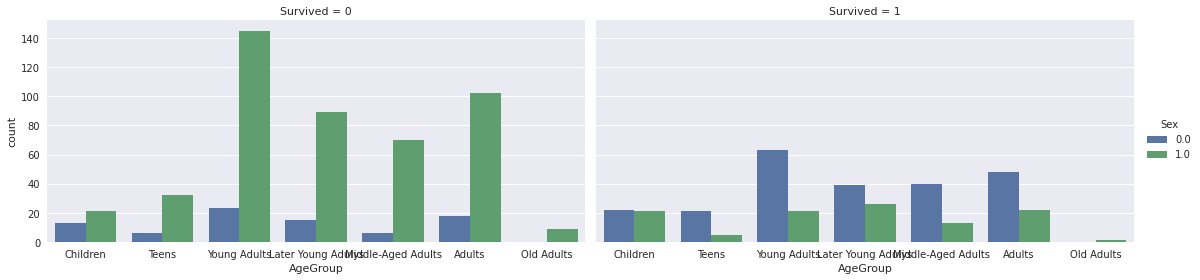

In [32]:
ax = sns.barplot(data=OH_train_data, x='AgeGroup', y='Survived')
ax.set_title(f'age group by Survived');
for container in ax.containers:
    ax.bar_label(container)
plt.show()

ax = sns.catplot(data=OH_train_data, x='AgeGroup',  col="Survived",kind = "count",hue = 'Sex', height=4, aspect=2)
plt.show()

> ## SibSp, Parch:  
**We have a good correlation between the properties: parch, sbsp.  
Remember, parch indicates the number of relatives (children and parents), and sibsp indicates the number of cousins.  
In total, it is possible to unite them in a new feature to be called - family size**


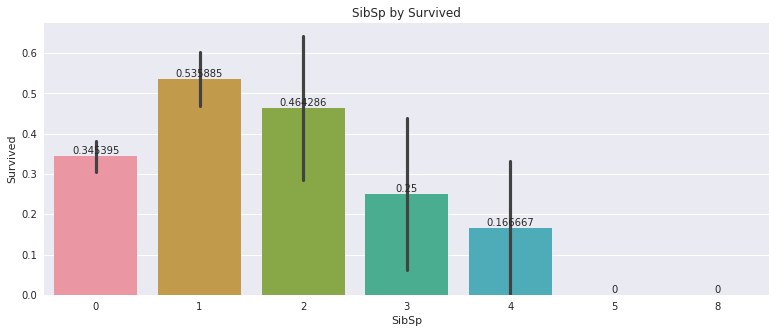

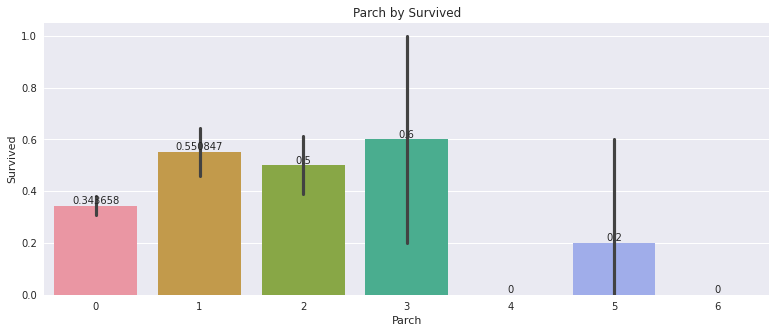

In [33]:
plt.subplots(figsize=(13, 5))
ax = sns.barplot(data=train_data, x='SibSp', y='Survived')
ax.set_title(f'SibSp by Survived');
for container in ax.containers:
    ax.bar_label(container)
plt.show()

plt.subplots(figsize=(13, 5))
ax = sns.barplot(data=train_data, x='Parch', y='Survived')
ax.set_title(f'Parch by Survived');
for container in ax.containers:
    ax.bar_label(container)
plt.show()

> ### Feature Union-

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroup,AgeGroupEncoding,Fare_new,FareEncoding,Family_Size
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,Young Adults,6.0,"(-0.001, 7.854]",0.0,1
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,Middle-Aged Adults,3.0,"(39.688, 512.329]",4.0,1
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,Young Adults,6.0,"(7.854, 10.5]",1.0,0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,Middle-Aged Adults,3.0,"(39.688, 512.329]",4.0,1
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,Middle-Aged Adults,3.0,"(7.854, 10.5]",1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0,Later Young Adulys,2.0,"(10.5, 21.679]",2.0,0
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,Young Adults,6.0,"(21.679, 39.688]",3.0,0
888,889,0,3,31.0,1,2,23.4500,0.0,0.0,1.0,Later Young Adulys,2.0,"(21.679, 39.688]",3.0,3
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,Young Adults,6.0,"(21.679, 39.688]",3.0,0


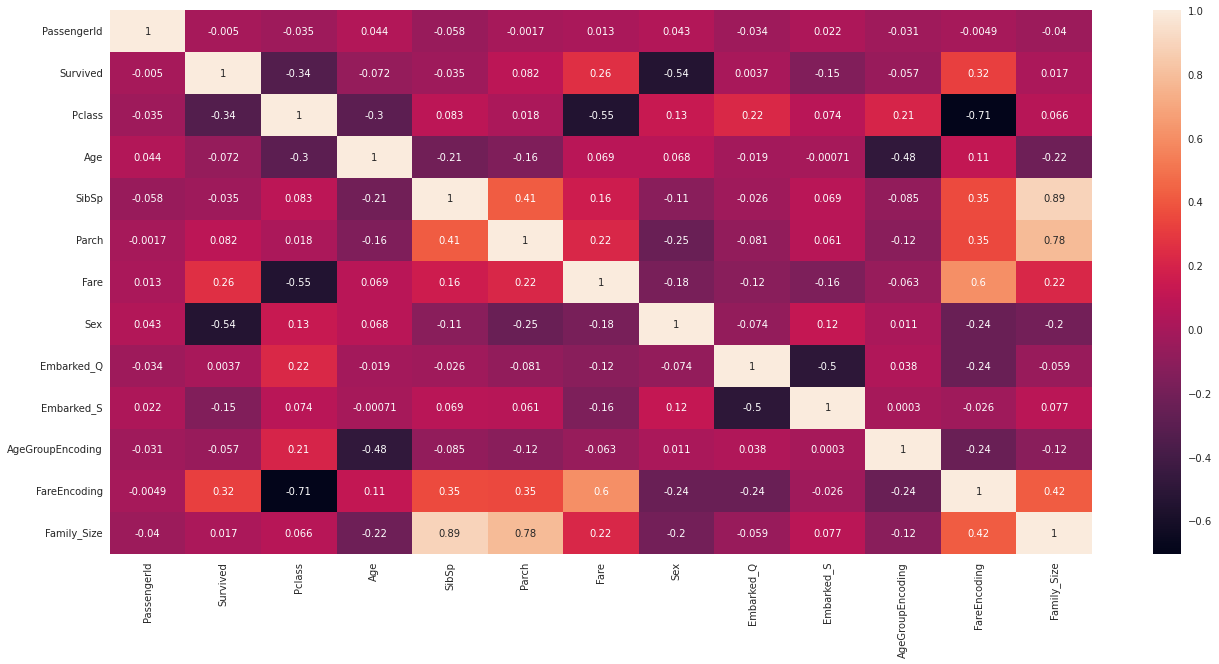

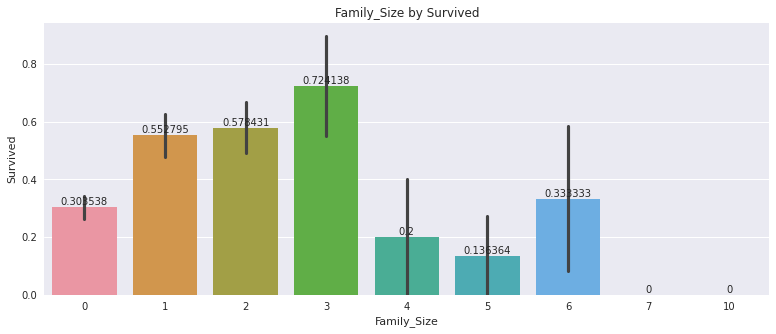

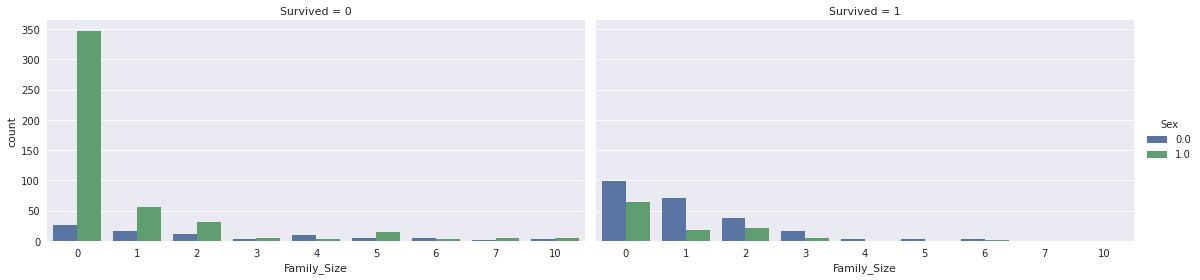

In [34]:
OH_test_data['Family_Size'] = OH_test_data['Parch'] + OH_test_data['SibSp']
OH_train_data['Family_Size'] = OH_train_data['Parch'] + OH_train_data['SibSp']

display(OH_train_data)
corrMatrix = OH_train_data.corr()

plt.subplots(figsize=(22, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

#Exploratory data analysis
plt.subplots(figsize=(13, 5))
ax = sns.barplot(data=OH_train_data, x='Family_Size', y='Survived')
ax.set_title(f'Family_Size by Survived');
for container in ax.containers:
    ax.bar_label(container)
plt.show()

ax = sns.catplot(data=OH_train_data, x='Family_Size',  col="Survived",kind = "count",hue = 'Sex', height=4, aspect=2)
plt.show()


> ### Let's see if a passenger who arrived without a family improves his chances of survival  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroup,AgeGroupEncoding,Fare_new,FareEncoding,Family_Size,Lonely_passenger
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,Young Adults,6.0,"(-0.001, 7.854]",0.0,1,False
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,Middle-Aged Adults,3.0,"(39.688, 512.329]",4.0,1,False
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,Young Adults,6.0,"(7.854, 10.5]",1.0,0,True
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,Middle-Aged Adults,3.0,"(39.688, 512.329]",4.0,1,False
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,Middle-Aged Adults,3.0,"(7.854, 10.5]",1.0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0,Later Young Adulys,2.0,"(10.5, 21.679]",2.0,0,True
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,Young Adults,6.0,"(21.679, 39.688]",3.0,0,True
888,889,0,3,31.0,1,2,23.4500,0.0,0.0,1.0,Later Young Adulys,2.0,"(21.679, 39.688]",3.0,3,False
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,Young Adults,6.0,"(21.679, 39.688]",3.0,0,True


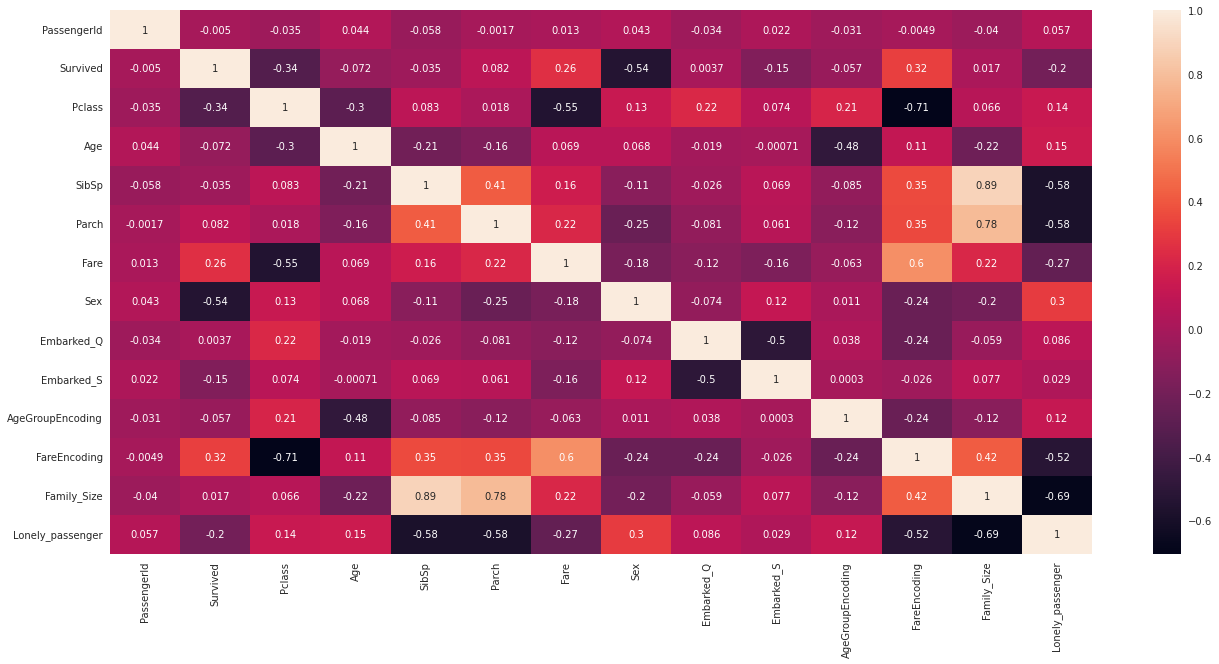

<function matplotlib.pyplot.show(close=None, block=None)>

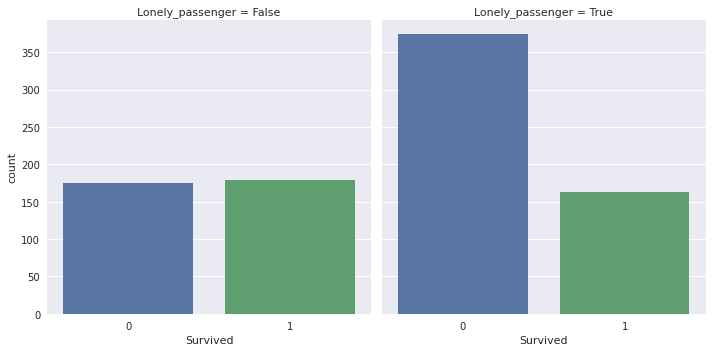

In [35]:
OH_train_data['Lonely_passenger'] = OH_train_data['Family_Size'] ==0
display(OH_train_data)
corrMatrix = OH_train_data.corr()
plt.subplots(figsize=(22, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()
ax = sns.catplot(x="Survived", col="Lonely_passenger",
                data=OH_train_data, kind="count")
plt.show


## **Conclusions:**  
* **For those who did not survive:**  
    * Men without a family - a high percentage of non-survivors, significantly.
    * As the family grew, more men did not survive than women.  
    * Men led over women, and the large amount who did not survive from men came from the Young Adults age category.  
    

* **For those who survived:**  
    * The lower the family size, the more women survived the men.
    * As the size of the family increased, the number of survivors of women and men decreased.  
    * Women survived more than men in all age categories except Infant.  
         There is significance in the same age range of women's survival.

> ## Embarked:  
Before I dive into the data I will try to understand what this feature means in terms of the ship's story.  
Let's take a look at the Titanic's schedule:  

![picture](https://drive.google.com//uc?export=view&id=1zqF6A8o6has0m2EvQzlk4jq9Giph97g5)

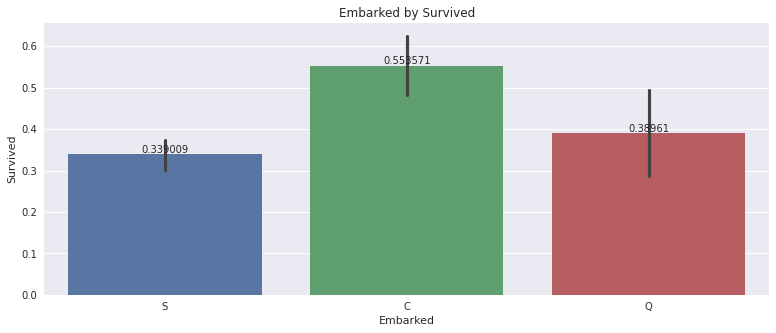

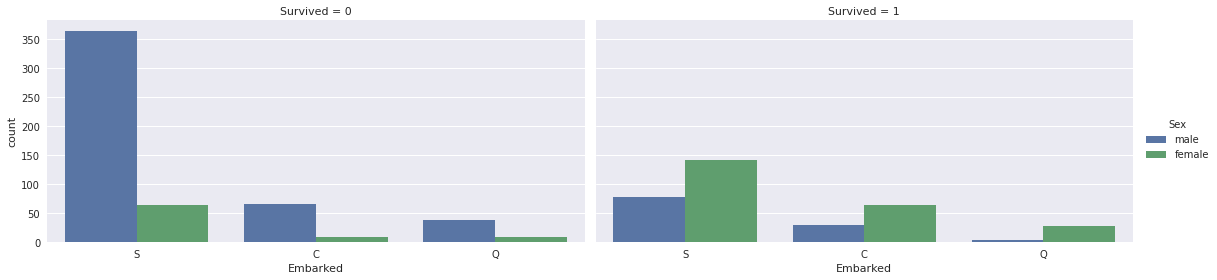

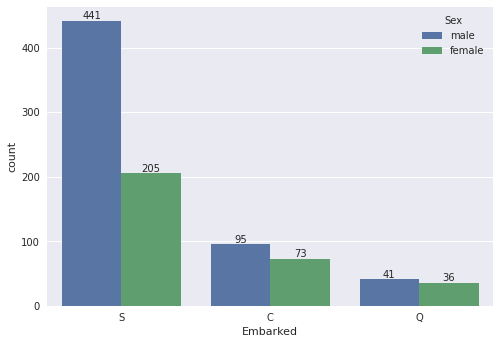

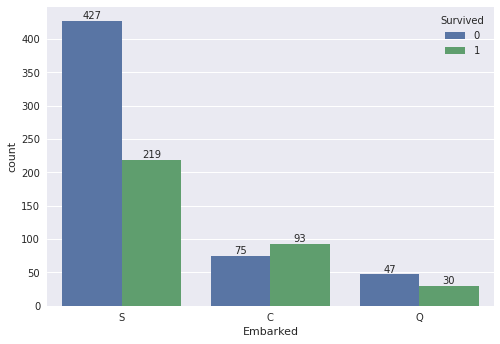

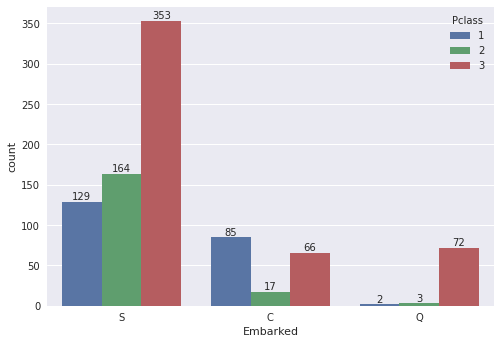

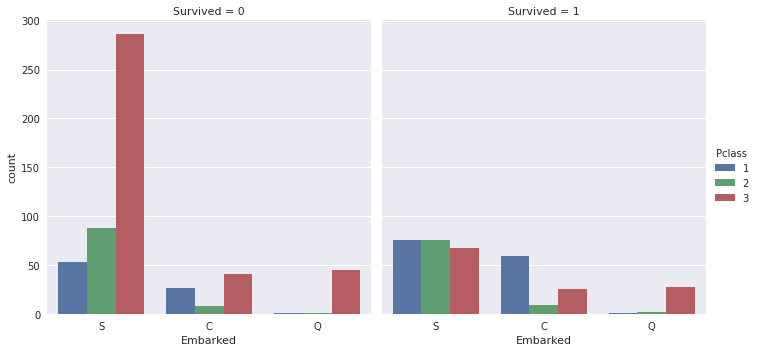

In [36]:
plt.subplots(figsize=(13, 5))
ax = sns.barplot(data=train_data, x='Embarked', y='Survived')
ax.set_title(f'Embarked by Survived');
for container in ax.containers:
    ax.bar_label(container)
plt.show()

ax = sns.catplot(data=train_data, x='Embarked',  col="Survived",kind = "count",hue = 'Sex', height=4, aspect=2)
plt.show()

ax = sns.countplot(data=train_data, x="Embarked", hue="Sex")
for container in ax.containers:
    ax.bar_label(container)
plt.show()
ax = sns.countplot(data=train_data, x="Embarked", hue="Survived")
for container in ax.containers:
    ax.bar_label(container)
plt.show()
ax = sns.countplot(data=train_data, x="Embarked",hue = "Pclass")
for container in ax.containers:
    ax.bar_label(container)
plt.show()
ax = sns.catplot(data=train_data, x="Embarked",col="Survived",kind = "count",hue = "Pclass")

plt.show()


### **Conclusions:** 
**At each point of boarding the men did not survive significantly compared to women.**  

* **Boarding from Southampton:**
    * 72% of the people boarded the ship at this point.
    * 69% of them are men, 31% of them are women
    * It is evident that 66% did not survive, and 33% survived.
    * There is a significant difference between the surviving women and the men at this embark point.
    * More than half of the people were in a third class.
    * It is also seen that a third class did not survive compared to classes 2 and 1.  

* **Boarding from Cherbourg:**  
    * 19% of all the people on the ship boarded the ship at this point.  
    * 56% of them are men, 44% of them are women.  
    * Here, there was a better chance of being saved - 44% did not survive, 55% survived.  
    * Many of the people who came up at this embark were in first class 
    * It is seen that first class leads in the chances of survival over the rest.   

* **Boarding from Queenstown:**
    * 9% of the people on the ship boarded at this point.
    * 53% men, 47% women.
    * Slight chance of being rescued - over half of the people who ascended at this point did not survive.
    * Almost everyone held third-class tickets except for 5 people.
    


> ## Fare:  
According to the correlation I saw above, the correlation between ticket price (fare) and the chance of survival is positive, which means that the more a person pays, the higher his chances of being saved.
My hypothesis- the more a person paid he got to first class and was saved due to the class' location on the ship.

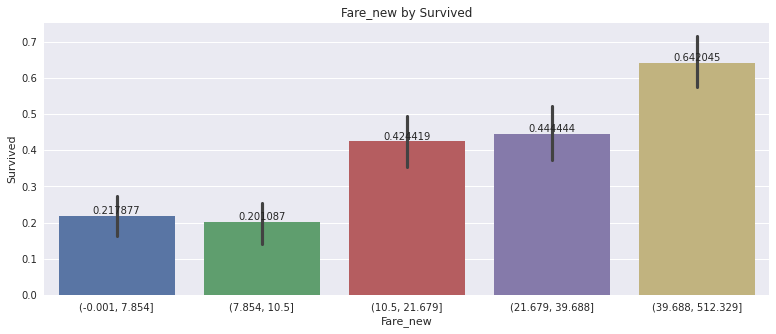

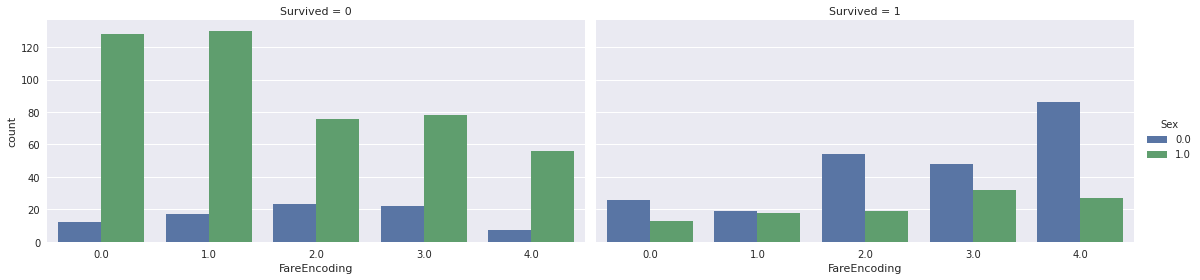

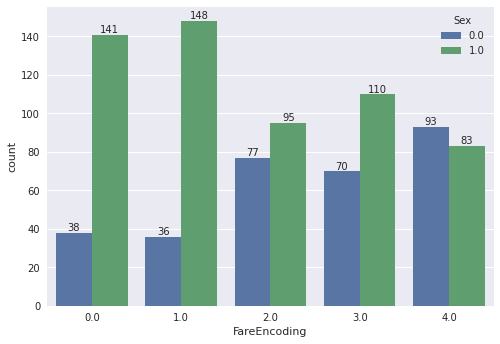

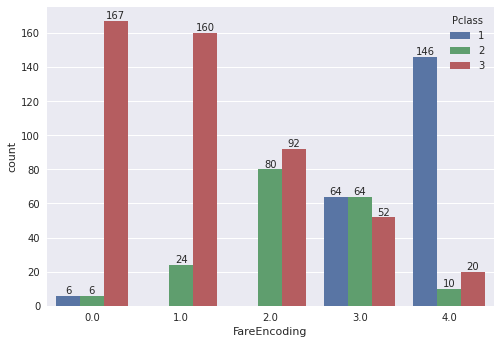

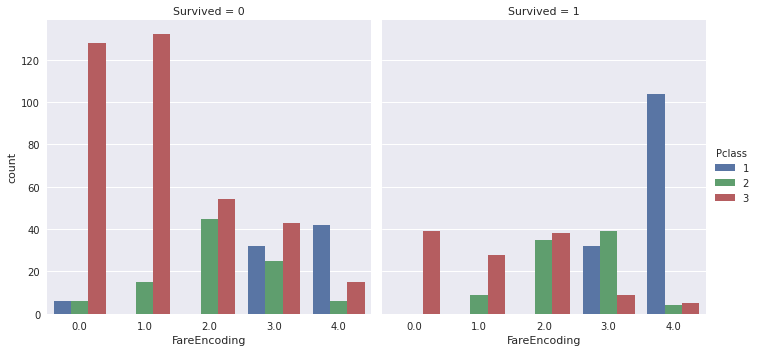

In [37]:
plt.subplots(figsize=(13, 5))
ax = sns.barplot(data=OH_train_data, x='Fare_new', y='Survived')
ax.set_title(f'Fare_new by Survived');
for container in ax.containers:
    ax.bar_label(container)
plt.show()

ax = sns.catplot(data=OH_train_data, x='FareEncoding',  col="Survived",kind = "count",hue = 'Sex', height=4, aspect=2)
plt.show()

ax = sns.countplot(data=OH_train_data, x="FareEncoding", hue="Sex")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

ax = sns.countplot(data=OH_train_data, x="FareEncoding",hue = "Pclass")
for container in ax.containers:
    ax.bar_label(container)
plt.show()
ax = sns.catplot(data=OH_train_data, x="FareEncoding",col="Survived",kind = "count",hue = "Pclass")

plt.show()



## ***Drop column***

In [38]:
display(OH_train_data)
display(OH_test_data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroup,AgeGroupEncoding,Fare_new,FareEncoding,Family_Size,Lonely_passenger
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,Young Adults,6.0,"(-0.001, 7.854]",0.0,1,False
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,Middle-Aged Adults,3.0,"(39.688, 512.329]",4.0,1,False
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,Young Adults,6.0,"(7.854, 10.5]",1.0,0,True
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,Middle-Aged Adults,3.0,"(39.688, 512.329]",4.0,1,False
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,Middle-Aged Adults,3.0,"(7.854, 10.5]",1.0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0,Later Young Adulys,2.0,"(10.5, 21.679]",2.0,0,True
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,Young Adults,6.0,"(21.679, 39.688]",3.0,0,True
888,889,0,3,31.0,1,2,23.4500,0.0,0.0,1.0,Later Young Adulys,2.0,"(21.679, 39.688]",3.0,3,False
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,Young Adults,6.0,"(21.679, 39.688]",3.0,0,True


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroup,AgeGroupEncoding,Fare_new,FareEncoding,Family_Size
0,892,3,34.5,0,0,7.8292,1.0,1.0,0.0,Middle-Aged Adults,3.0,"(-0.001, 7.854]",0.0,0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0,Adults,0.0,"(-0.001, 7.854]",0.0,1
2,894,2,62.0,0,0,9.6875,1.0,1.0,0.0,Adults,0.0,"(7.854, 10.5]",1.0,0
3,895,3,27.0,0,0,8.6625,1.0,0.0,1.0,Later Young Adulys,2.0,"(7.854, 10.5]",1.0,0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0,Young Adults,6.0,"(10.5, 21.679]",2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,21.0,0,0,8.0500,1.0,0.0,1.0,Young Adults,6.0,"(7.854, 10.5]",1.0,0
414,1306,1,39.0,0,0,108.9000,0.0,0.0,0.0,Middle-Aged Adults,3.0,"(39.688, 512.329]",4.0,0
415,1307,3,38.5,0,0,7.2500,1.0,0.0,1.0,Middle-Aged Adults,3.0,"(-0.001, 7.854]",0.0,0
416,1308,3,21.0,0,0,8.0500,1.0,0.0,1.0,Young Adults,6.0,"(7.854, 10.5]",1.0,0


> First I'll drop the non-numeric columns: 'Lonely_passenger','AgeGroup'.  
> Next, I will remove the columns that do not contribute to my data analysis: 'PassengerId','Age'  
> Finally, I will remove the columns I created from new columns that are more useful: 'Parch', 'Sibsp'
> * note: 'Age' contributes to the data but only when categorized so I left 'AgeGroupEncoding'.

In [39]:
OH_train_data.drop(columns=['PassengerId','AgeGroup','Lonely_passenger'],axis=1,inplace=True)
display(OH_train_data)

test_df_PassengerId = test_df['PassengerId']
OH_test_data.drop(columns=['PassengerId','AgeGroup'],axis=1,inplace=True)
display(OH_test_data)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroupEncoding,Fare_new,FareEncoding,Family_Size
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,6.0,"(-0.001, 7.854]",0.0,1
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,3.0,"(39.688, 512.329]",4.0,1
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,6.0,"(7.854, 10.5]",1.0,0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,3.0,"(39.688, 512.329]",4.0,1
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,3.0,"(7.854, 10.5]",1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1.0,0.0,1.0,2.0,"(10.5, 21.679]",2.0,0
887,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,6.0,"(21.679, 39.688]",3.0,0
888,0,3,31.0,1,2,23.4500,0.0,0.0,1.0,2.0,"(21.679, 39.688]",3.0,3
889,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,6.0,"(21.679, 39.688]",3.0,0


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroupEncoding,Fare_new,FareEncoding,Family_Size
0,3,34.5,0,0,7.8292,1.0,1.0,0.0,3.0,"(-0.001, 7.854]",0.0,0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,"(-0.001, 7.854]",0.0,1
2,2,62.0,0,0,9.6875,1.0,1.0,0.0,0.0,"(7.854, 10.5]",1.0,0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0,2.0,"(7.854, 10.5]",1.0,0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0,6.0,"(10.5, 21.679]",2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,21.0,0,0,8.0500,1.0,0.0,1.0,6.0,"(7.854, 10.5]",1.0,0
414,1,39.0,0,0,108.9000,0.0,0.0,0.0,3.0,"(39.688, 512.329]",4.0,0
415,3,38.5,0,0,7.2500,1.0,0.0,1.0,3.0,"(-0.001, 7.854]",0.0,0
416,3,21.0,0,0,8.0500,1.0,0.0,1.0,6.0,"(7.854, 10.5]",1.0,0


### After many runs and attempts to remove the following columns - leads to a good result  
note: fare removal-  
From the assumption - the division of first, second and third class is according to the cost of a ticket (better class = higher payment).  
At the same time, there are passengers who have boarded from 3 collection points, assuming that each collection point of   payment is different, so at the moment we have disabled the cost feature to get a better prediction according to key parameters.

In [40]:
# Removal for linear model
# X = OH_train_data.drop(columns=['SibSp','Parch','AgeGroupEncoding','Pclass','Embarked_Q','Embarked_S','Fare_new','FareEncoding'])
# display(X)

#option 1
#Removal for logistics model
# X = OH_train_data.drop(columns=['SibSp','Parch','Age','Fare','Fare_new','Embarked_Q','Embarked_S','Family_Size','FareEncoding'])
# display(X)
# X_test = OH_test_data.drop(columns=['SibSp','Parch','Age','Embarked_Q','Embarked_S','Fare','Fare_new','Family_Size','FareEncoding'])
# display(X_test)

#option 2
#Removal for logistics model- score = 79.8 (0.35 for valid)
# X = OH_train_data.drop(columns=['SibSp','Parch','Age','Fare','Fare_new','FareEncoding'])
# X_test = OH_test_data.drop(columns=['SibSp','Parch','Age','Fare','Fare_new','FareEncoding'])
# display(X)

#option 2
#Removal for logistics model- score = 79.8 (0.35 for valid)
# saving the dataframes-befor drastic changes
train_df_cpy, test_df_cpy = OH_train_data.copy(), OH_test_data.copy()

X = OH_train_data.drop(columns=['SibSp','Parch','Age','Fare','Fare_new','FareEncoding'])
X_test = OH_test_data.drop(columns=['SibSp','Parch','Age','Fare','Fare_new','FareEncoding'])
display(X)

,Survived,Pclass,Sex,Embarked_Q,Embarked_S,AgeGroupEncoding,Family_Size
0,0,3,1.0,0.0,1.0,6.0,1
1,1,1,0.0,0.0,0.0,3.0,1
2,1,3,0.0,0.0,1.0,6.0,0
3,1,1,0.0,0.0,1.0,3.0,1
4,0,3,1.0,0.0,1.0,3.0,0
...,...,...,...,...,...,...,...
886,0,2,1.0,0.0,1.0,2.0,0
887,1,1,0.0,0.0,1.0,6.0,0
888,0,3,0.0,0.0,1.0,2.0,3
889,1,1,1.0,0.0,0.0,6.0,0


> # **5.Data Slicing**

> **First and foremost -  
> Data Slicing**  
We can not check the performence of the model on the same dataset that the model was   trained on.  
This will result in wrong estimation for the model generalization capabilities.  
In order to check our prediction and fine-tune the model parameters, we need to slice   the dataset into 2 groups:  
  
> 1. train  
> 2. validation   

> We will train on the train data and check the performance on the validation data.  
We will slice the dataset with Scikit-learn train_test_split.  
First, let's split the data to features X and target t.  

In [41]:
t = OH_train_data['Survived'].copy()
X = X.drop(['Survived'],axis = 1)

Now, we can split the data to train and validation.  
We can choose number of values for the test_size argument.  
Let's check few of them with NE and MSE.  
* We can plot the data with Plotly scatter.  

In [42]:
# print 4 graphs: mse of train/test and r2 of train/test
def print_graphs_r2_mse(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'R2' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        if('R2' in k):
            fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color], labels={
                    'x': "Data distribution values",
                    'y': "Score"
                    
                 })
        else:
            fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color], labels={
                    'x': "Data distribution values",
                    'y': "MSE"
                    
                 })
        fig.data[0].update(mode='markers+lines')
        fig.show()
        
# plot the score by split and the loss by split
def plot_score_and_loss_by_split(X, t):
    graph_points = {
                    'train_MSE':{},
                    'val_MSE': {},
                    'train_R2': {},
                    'val_R2': {}
                    }
    for size in range(10, 100, 10):
        X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=size/100, random_state=42)
        NE_reg = linear_model.LogisticRegression().fit(X_train, t_train)
        y_train = NE_reg.predict(X_train)
        y_val = NE_reg.predict(X_val)
        graph_points['train_MSE'][size/100] = metrics.mean_squared_error(t_train, y_train)
        graph_points['val_MSE'][size/100] = metrics.mean_squared_error(t_val, y_val)
        graph_points['train_R2'][size/100] = NE_reg.score(X_train, t_train)
        graph_points['val_R2'][size/100] = NE_reg.score(X_val, t_val)
    print_graphs_r2_mse(graph_points)

plot_score_and_loss_by_split(X, t)

In [43]:
def fit_and_eval_ne(X_train, X_val, t_train, t_val):
  NE_reg = linear_model.LinearRegression().fit(X_train, t_train)
  y_train = NE_reg.predict(X_train)
  y_val = NE_reg.predict(X_val)
  print("MSE Train:", metrics.mean_squared_error(t_train, y_train))
  print("MSE Valid:", metrics.mean_squared_error(t_val, y_val))
  print("R^2 Train:", NE_reg.score(X_train, t_train))
  print("R^2 Valid:", NE_reg.score(X_val, t_val))

> **Decision moment:**  
[Explanation of data splitting](http://https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)  
Logistic regression does not really have any critical hyperparameters to tune.  
Sometimes, you can see useful differences in performance or convergence with different solvers (solver). Regularization (penalty) can sometimes be helpful.   
In saying this we can conclude that it will be easy to adjust, and therefore the size of the validation set can be reduced.  
[Explanation of Hyperparameter Tuning](http://https://www.analyticsvidhya.com/blog/2021/04/evaluating-machine-learning-models-hyperparameter-tuning/)  
The pair that yields a relatively good result in terms of MSE and score and also the differences (between training set and validation set) are relatively minor:  
**train_size = 0.7 (70% from the data), validation_size = 0.3 (35% from the data)**  
So let's take a good place in the middle where you see improvement and it is:  
valid = 0.35.  
The claim is consistent with the above statement.

In [44]:
X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=0.35, random_state=42)
fit_and_eval_ne(X_train, X_val, t_train, t_val)

MSE Train: 0.1487875801876852
MSE Valid: 0.14583239612645554
R^2 Train: 0.3661885032694635
R^2 Valid: 0.39104715303132787


In [45]:
print(f'X_train:{X_train.index}\nt_train:{t_train.index}\nX_val:{X_val.index}\nt_val:{t_val.index}')


X_train:Int64Index([547, 108, 603,  56, 394, 706, 549,  24, 351, 429,
            ...
            121, 614,  20, 700,  71, 106, 270, 860, 435, 102],
           dtype='int64', length=579)
t_train:Int64Index([547, 108, 603,  56, 394, 706, 549,  24, 351, 429,
            ...
            121, 614,  20, 700,  71, 106, 270, 860, 435, 102],
           dtype='int64', length=579)
X_val:Int64Index([709, 439, 840, 720,  39, 290, 300, 333, 208, 136,
            ...
            145, 234, 220, 370, 811, 132, 694, 864, 185,  41],
           dtype='int64', length=312)
t_val:Int64Index([709, 439, 840, 720,  39, 290, 300, 333, 208, 136,
            ...
            145, 234, 220, 370, 811, 132, 694, 864, 185,  41],
           dtype='int64', length=312)


> ### Sizes:  
> * Training group = 612 rows  
> * Validation group = 205 rows


# 6. Build Model
> In this challenge i'll try with logistic regression model. 
> ## Logistic Regression:

In [46]:
def predictFunc(model,x_train,y_train,x_test,y_test):          
    model.fit(x_train, y_train)
    
    # Make predictions
    predictions = model.predict(x_test)
    
     # Compute accuracy
    print(f'Model Accuracy: {accuracy_score(predictions,y_test)*100}%')
    print('\n')
    
log_reg = LogisticRegression()
predictFunc(log_reg,X_train,t_train,X_val,t_val)

Model Accuracy: 79.16666666666666%




> ## Multi Layer Perceptron (MLP):

In [47]:
#with solver 'sgd', the accuracy = 79.48718% + convergenceWarnning
#with solver 'lbfgs' tried to do another encoding- did not work
#with solver adam, the accuracy = 80.1282% + convergenceWarnning
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-5,
                     hidden_layer_sizes=(50,50), random_state=1)
mlp.fit(X_train,t_train)
predictFunc(mlp,X_train,t_train,X_val,t_val)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Model Accuracy: 81.73076923076923%




/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



> # **7. Submitting results**  

> Now, after analyzing all the data and performing a "mini-test" on the data (using the Validation group). It's time for us to test our model for real this time.  
* Note: For the Logistic regression we removed a lot of features and left only the critical ones:  
    * Family size (I showed the relationship of size to survival above)
    * Gender (male / female)
    * PClass
        * These features clearly showed the chances of survival of the passenger on the Titanic.
             * fare- I canceled the pclass feature because of the correlation between them (described above).
    * AgeGroupEncoding
    * Embarked
       

In [48]:
display(test_df)
display(OH_test_data)
display(X_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,21.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,21.0,0,0,8.0500,S


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroupEncoding,Fare_new,FareEncoding,Family_Size
0,3,34.5,0,0,7.8292,1.0,1.0,0.0,3.0,"(-0.001, 7.854]",0.0,0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,"(-0.001, 7.854]",0.0,1
2,2,62.0,0,0,9.6875,1.0,1.0,0.0,0.0,"(7.854, 10.5]",1.0,0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0,2.0,"(7.854, 10.5]",1.0,0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0,6.0,"(10.5, 21.679]",2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,21.0,0,0,8.0500,1.0,0.0,1.0,6.0,"(7.854, 10.5]",1.0,0
414,1,39.0,0,0,108.9000,0.0,0.0,0.0,3.0,"(39.688, 512.329]",4.0,0
415,3,38.5,0,0,7.2500,1.0,0.0,1.0,3.0,"(-0.001, 7.854]",0.0,0
416,3,21.0,0,0,8.0500,1.0,0.0,1.0,6.0,"(7.854, 10.5]",1.0,0


,Pclass,Sex,Embarked_Q,Embarked_S,AgeGroupEncoding,Family_Size
0,3,1.0,1.0,0.0,3.0,0
1,3,0.0,0.0,1.0,0.0,1
2,2,1.0,1.0,0.0,0.0,0
3,3,1.0,0.0,1.0,2.0,0
4,3,0.0,0.0,1.0,6.0,2
...,...,...,...,...,...,...
413,3,1.0,0.0,1.0,6.0,0
414,1,0.0,0.0,0.0,3.0,0
415,3,1.0,0.0,1.0,3.0,0
416,3,1.0,0.0,1.0,6.0,0


In [49]:
log_reg.fit(X, t)
pred_test_logistic_regression = log_reg.predict(X_test).copy()

submission_log_reg = pd.DataFrame({
        'PassengerId': test_df_PassengerId,
        'Survived': pred_test_logistic_regression
    })
submission_log_reg.Survived = submission_log_reg.Survived.astype(int)
print(submission_log_reg.shape)
display(submission_log_reg)

# submission_log_reg.to_csv('submission.csv', index=False)

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [50]:
mlp.fit(X, t)
pred_test_mlp = mlp.predict(X_test).copy()

submission_mlp = pd.DataFrame({
        'PassengerId': test_df_PassengerId,
        'Survived': pred_test_mlp
    })
submission_mlp.Survived = submission_mlp.Survived.astype(int)
print(submission_mlp.shape)
display(submission_mlp)

# submission_mlp.to_csv('submission.csv', index=False)

(418, 2)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Preliminary knowledge
* **Correlation**:  
    * **positive correlation:**  
     relationship between two variables in which both variables move in the same direction.  
     Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.  
     For example fare & Survived:  
     The correlation between them is 0.26 and is the highest among the adapters to the Survived feature,  
     probably a passenger who paid more fare had a greater chance  of being saved (perhaps because he was in a better position on the ship).  
     
    * **negative correlation:**  
    relationship between two variables in which an increase in one variable is associated with a decrease in the other. 
    For example fare & pClass:  
    The correlation between them is -0.55, that is, the more a passenger paid, the lower class (numerically) he received.  
    let's say you paid the maximum price - you got first class (according to the value, this is number 1).  
    
    *  **zero correlation:**  
    exists when there is no relationship between two variables.  
     For example there is no relationship between the amount of tea drunk and level of intelligence.

# Work Summary:
I started from an in-depth investigation of the data to understand the context for the survival findings.  
I performed a lot of division group validation and training options.  
Attached are links explaining the topic.  
Eventually I realized that the chances of survival converge to the following parameters:  
* Your location on the ship (Pclass)  
* Gender of the passenger.  
* Family size.  
* Age.  
* The person's origin (Embarked).  
At first I divided the age by groups I thought would describe the distribution of the feature but this division did not contribute to the model predicting the validation group.  

# Sources:
* [Inspiration from notebook](https://www.kaggle.com/watcher2747/titanic-knn-and-linear-regression) 
* [Creating the graphs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)
* [Documentation of the Titanic story](https://www.thoughtco.com/titanic-timeline-1779210)
* [Ship structure](https://www.datavis.ca/papers/titanic/)
* [Data Cleaning - Course](https://www.kaggle.com/learn/data-cleaning)
* [Intermediate Machine Learning - Course](https://www.kaggle.com/learn/intermediate-machine-learning)  



# Leaderboard:   
The best result so far has been obtained using the MLP model. 

![picture](https://drive.google.com//uc?export=view&id=1zHWqPGYCNsIAPgThI9hXxToXkFU7x5N2)  


Position in Leaderboard:  


![picture](https://drive.google.com//uc?export=view&id=1kKIRP_zFqntFo4qE6RbcPOguT8p05OzI)

# Improving results (assignment 3):  
**The goal: to try to improve results using KNN, LDA, NBC models**  
Using feature selection methods, cv and more.

In [51]:
from tqdm.auto import tqdm
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
import plotly.graph_objects as go

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [52]:
display(train_df_cpy)
t = train_df_cpy['Survived'].copy()
x = train_df_cpy.drop(['Survived','Fare_new'],axis = 1).copy()
display(x)
x.dtypes
#test_df_cpy 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroupEncoding,Fare_new,FareEncoding,Family_Size
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,6.0,"(-0.001, 7.854]",0.0,1
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,3.0,"(39.688, 512.329]",4.0,1
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,6.0,"(7.854, 10.5]",1.0,0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,3.0,"(39.688, 512.329]",4.0,1
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,3.0,"(7.854, 10.5]",1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1.0,0.0,1.0,2.0,"(10.5, 21.679]",2.0,0
887,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,6.0,"(21.679, 39.688]",3.0,0
888,0,3,31.0,1,2,23.4500,0.0,0.0,1.0,2.0,"(21.679, 39.688]",3.0,3
889,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,6.0,"(21.679, 39.688]",3.0,0


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,AgeGroupEncoding,FareEncoding,Family_Size
0,3,22.0,1,0,7.2500,1.0,0.0,1.0,6.0,0.0,1
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,3.0,4.0,1
2,3,26.0,0,0,7.9250,0.0,0.0,1.0,6.0,1.0,0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0,3.0,4.0,1
4,3,35.0,0,0,8.0500,1.0,0.0,1.0,3.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1.0,0.0,1.0,2.0,2.0,0
887,1,19.0,0,0,30.0000,0.0,0.0,1.0,6.0,3.0,0
888,3,31.0,1,2,23.4500,0.0,0.0,1.0,2.0,3.0,3
889,1,26.0,0,0,30.0000,1.0,0.0,0.0,6.0,3.0,0


Pclass                int64
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Sex                 float64
Embarked_Q          float64
Embarked_S          float64
AgeGroupEncoding    float64
FareEncoding        float64
Family_Size           int64
dtype: object

# Cross-Validation:

In [53]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [54]:
categorical_cols = x.select_dtypes(include=['object', 'bool']).columns
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns
ct = ColumnTransformer([
    ("encoding_cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard_poly", make_pipeline(PolynomialFeatures(degree=2), StandardScaler()), numerical_cols)],
    remainder='passthrough')
model_pipe = make_pipeline(ct,  SGDClassifier(loss='log', random_state=2))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(x, t, model_pipe, transformer=ct, k=10,
                                                                     show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

mean cv val score: 0.76
mean cv val loss 0.24
mean cv val score: 0.77
mean cv val loss 0.23


## Conclusion:
* SGDClassifier with k = 7 gives nice results.
* I'll try to increase the score, and decrease the loss.
* using feature selection methods & hyper-tunning.

# Hyper-Parameter Tunning:
Most of our models have a lot of parameters that can be adjusted.  
Each parameter value can make our model better (or worse).  
We want to be able to find the best hyperparameters for our models.  
We have two approaches:  
1. Grid Search
2. Random Search

### Grid Search
When we want to check every parameter possible, we will use Grid Search.  
We will try all combinations of parameters and find the best one, that gives us the best score.  
This may be a little exhaustive, especially when we want to check a lot of parameters and values.  

### Random Search
We can choose to get random combinations of parameters and check the score on them.  
This will not be as accurate as Grid Search, but it will take less time.

In [55]:
# train with grid search and get best parameters

hyper_parameters = { 'penalty': ('l1', 'l2', 'elasticnet'),
                    'alpha': [0.1, 0.01, 0.001, 0.0001],
                    'learning_rate': ('constant', 'optimal', 'invscaling', 'adaptive'),
                    'eta0': [0.1, 0.01, 0.001, 0.0001]}
X_ct = pd.DataFrame(ct.fit_transform(x))
#For later use in RandomizedSearchCV
x_ct2 = X_ct.copy()
gs_model = GridSearchCV(SGDClassifier(loss='log', random_state=2), hyper_parameters).fit(X_ct, t)
print('grid search score:', gs_model.best_score_)
print('grid search params:', gs_model.best_params_)
gs_params = gs_model.best_params_

grid search score: 0.8193333751804657
grid search params: {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant', 'penalty': 'elasticnet'}


In [56]:
# train with random search and get best parameters

np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])

rs_model = RandomizedSearchCV(SGDClassifier(), distributions, random_state=1).fit(x_ct2, t)
print('Accuracy score for classification:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)
rs_params = rs_model.best_params_

Accuracy score for classification:
rs_model 0.8103069487163392
best params {'alpha': 0.0923385947687978, 'penalty': 'l2'}


### Inference:
* It can be infer that with GridSearch you get better results,
    * I will use later:`grid search params: {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'adaptive', 'penalty': 'elasticnet'}` 
    * Unless different parameters came out for the different models (these parameters were obtained for-`SGDClassifier`)

# Feature Selection

We want to choose the best features for our use case.  
We have learned 3 methods of Feature Selection:  
1. **Forward Feature Selection**
2. **Backward Feature Selection**
3. **Hybrid Feature Selection**

In **Forward Feature Selection** we start from zero features and add features until we reach the number of maximum features or until we reach the best score.  
In **Backward Feature Selection** we start from the full feature set and remove features until we reach the number of minimum features or until we reach the best score.  
In **Hybrid Feature Selection**, we start from zero features and add/remove features until we reach the best score.  
[More on RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [57]:

sgd_C = SGDClassifier(random_state=1 )
sgd_C = sgd_C.set_params(**gs_params)
selector = RFECV(sgd_C, cv=RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)).fit(X_ct, t)

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
fig.update_xaxes(title_text="Number of features")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()
#support_ = ndarray of shape (n_features,) The mask of selected features.
display(X_ct.loc[:, selector.support_].keys())
print(f'#features: {(len(X_ct.loc[:, selector.support_].keys()))}')

Int64Index([ 2,  3,  4,  6, 11, 12, 14, 22, 23, 25, 27, 30, 38, 41, 44, 45, 49,
            50, 57, 60, 62, 77],
           dtype='int64')

#features: 22


In [58]:
x_best = X_ct.loc[:, selector.support_]
sgd_C = SGDClassifier(random_state=1 )
sgd_C = sgd_C.set_params(**gs_params)
model_pipe = make_pipeline(sgd_C)
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(x_best, t, model_pipe, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

sgd_C = SGDClassifier(random_state=1 )
sgd_C = sgd_C.set_params(**gs_params)
model_pipe = make_pipeline(sgd_C)
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_ct, t, model_pipe, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

mean cv val score: 0.81
mean cv val loss 0.19
mean cv val score: 0.83
mean cv val loss 0.17


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

mean cv val score: 0.81
mean cv val loss 0.19
mean cv train score: 0.82
mean cv train loss 0.18


### Inference:
**As you can see, I significantly improved the score average, and also reduced the loss value. This is done by selecting the best features (using the RFE method- that is based on the *Backward* Feature Selection.).**

# Choose Regularization method:  
In Hyper-Tunning section - I got (using grid search) the best parameters: {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'adaptive', 'penalty': 'elasticnet'}  
**Now, I will make sure that using the elasticnet method is indeed a priority over the rest**  
(now the Data-Frame will consist only the best features).

In [59]:
from sklearn.model_selection import cross_val_score
# print lasso, ridge and elasticnet scores as classification 
sgd_lasso_cls =SGDClassifier(penalty='l1', random_state=1)
sgd_ridge_cls = SGDClassifier(penalty='l2', random_state=1)
sgd_elastic_cls = SGDClassifier(penalty='elasticnet', random_state=1)

print("Accuracy score for classification:")
print('sgd_lasso', cross_val_score(make_pipeline(StandardScaler(), sgd_lasso_cls), x_best, t, cv=15).mean())
print('sgd_ridge', cross_val_score(make_pipeline(StandardScaler(), sgd_ridge_cls), x_best, t, cv=15).mean())
print('sgd_elastic', cross_val_score(make_pipeline(StandardScaler(), sgd_elastic_cls), x_best, t, cv=15).mean())

Accuracy score for classification:
sgd_lasso 0.7464595103578154
sgd_ridge 0.7463841807909605
sgd_elastic 0.7676647834274951


### Inference:
As can be seen, for the best features there is a preference for using **lasso** regularization

# Choose Ensemble method:  
## Ensembles - "The wisdom of the crowd":  
we use classification,then we can take the mean of all the probabilities of the model or choose the class that most of the models chose for some sample.   
One model may be wrong, but a lot of different models are less prone to errors.  

I'll check two types of ensembles:  
1. Bagging (with NFold or with Bootstrap).
2. Boosting.

### Bagging
We create a few bags of samples from the original dataset.  
We train a model on each of the bags of samples, and we return the combined score.
[BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html). 
### Boosting
We create a model and train it on the data.  
We take the samples that the model predicted incorrectly and multiply them (thus giving them more weight in the next training).  
We do this until we have few models, each of them is an expert on some type of samples.  
We combine all the model's predictions and return a combined score.  
There are few boosting algorithems ([AdaBoost](https://www.youtube.com/watch?v=LsK-xG1cLYA&ab_channel=StatQuestwithJoshStarmer), [GradientBoost](https://www.youtube.com/watch?v=3CC4N4z3GJc&ab_channel=StatQuestwithJoshStarmer), etc.).    
**Hyper-Parameter = n-estimator**

In [60]:
def show_accuracy_by_ensembel(X_train, t_train, X_val, t_val, ensembels):
    accuracy_df = pd.DataFrame(columns=['ensembel_name', 'split', 'accuracy'])

    for ensembel_name, ensembel_model in ensembels.items():
#         model_pipe = make_pipeline(ensembel, SGDClassifier(random_state=1))
#         model_pipe.fit(X_train, t_train)
        accuracy_df.loc[len(accuracy_df)] = [ensembel_name, 'train', ensembel_model.score(X_train, t_train)]
        accuracy_df.loc[len(accuracy_df)] = [ensembel_name, 'val', ensembel_model.score(X_val, t_val)]

    fig = px.bar(accuracy_df, x='ensembel_name', y='accuracy', color='split', barmode='group')
    fig.show()

In [61]:

hyper_parameters = {'n_estimators': [x for x in range(50, 501, 50)]}
sgd_C = SGDClassifier(random_state=1 )
sgd_C = sgd_C.set_params(**gs_params)

bag_fold_gs = GridSearchCV(BaggingClassifier(base_estimator=sgd_C,random_state=1, bootstrap=False), hyper_parameters).fit(x_best, t)
bag_boot_gs = GridSearchCV(BaggingClassifier(base_estimator=sgd_C,random_state=1, bootstrap=True), hyper_parameters).fit(x_best, t)
ada_boost_gs = GridSearchCV(AdaBoostClassifier(random_state=1), hyper_parameters).fit(x_best, t)

In [62]:
# get score with nfold bagging
bag_fold_model = BaggingClassifier(**bag_fold_gs.best_params_,base_estimator=SGDClassifier(), random_state=1, bootstrap=False).fit(x_best, t)
print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model.score(x_best, t).mean())

Accuracy score for classification:
bag_fold_model 0.8237934904601572


In [63]:
# get score with bootstrap bagging
bag_boot_model = BaggingClassifier(**bag_boot_gs.best_params_,base_estimator=sgd_C, random_state=1, bootstrap=True).fit(x_best, t)
print('Accuracy score for classification:')
print('bag_boot_model', bag_boot_model.score(x_best, t).mean())


Accuracy score for classification:
bag_boot_model 0.8305274971941639


In [64]:
# get score with ada boosting
ada_boost_model = AdaBoostClassifier(**ada_boost_gs.best_params_, random_state=1).fit(x_best, t)
print('Accuracy score for classification:')
print('ada_boost_model', ada_boost_model.score(x_best, t).mean())

Accuracy score for classification:
ada_boost_model 0.8787878787878788


In [65]:
ensembels = {'Bag_Fold': bag_fold_model, 'Bag_Boost': bag_boot_model, 'AdaBoost': ada_boost_model}
x_train, x_val, t_train, t_val = model_selection.train_test_split(x_best, t, test_size=0.2, random_state=2)
show_accuracy_by_ensembel(x_train, t_train, x_val, t_val, ensembels)

### Inference:
clearly- AdaBoost give the best accuracy result (close to 0.9!!).

# Confusion Matrix

We want to be able to explain the results of a classifier.  
When talking about binary classification, the classification type of a sample can be one out of four:
1. **TP (True Positive**) - The model classified correctly that a sample is positive.  
2. **TN (True Negative)** - The model classified correctly that a sample is negative.   
3. **FP (False Positive)** - The model classified a sample as positive but the sample is actually negative.  
4. **FN (False Negative)** - The model classified a sample as negative but the sample is actually positive.  




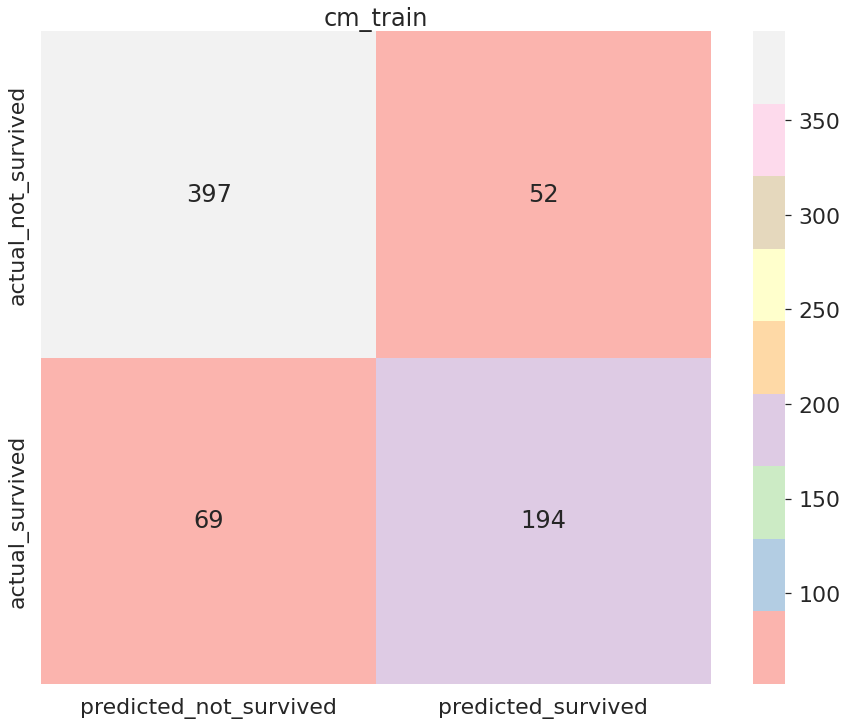

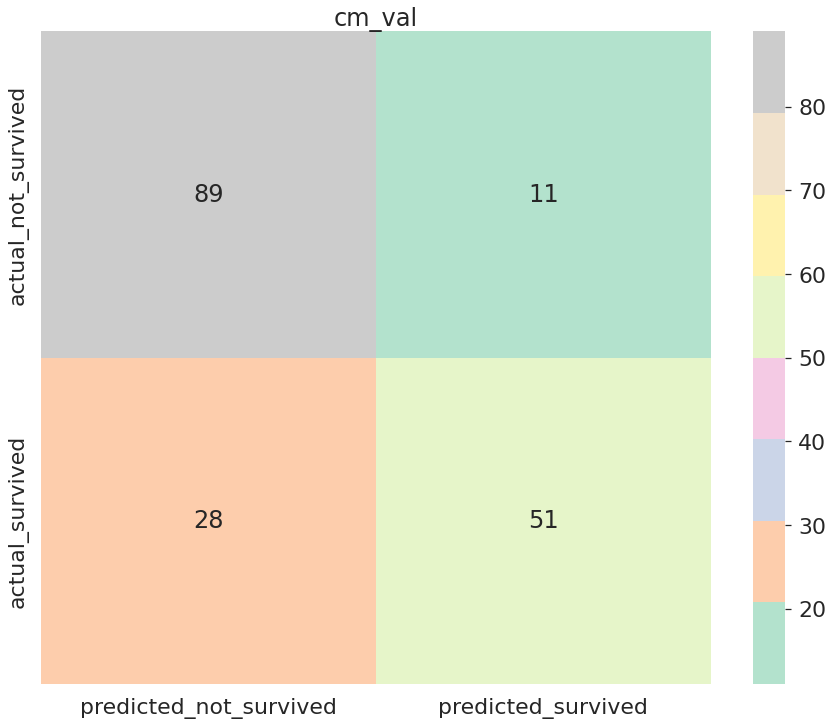

Train: TN  397, FP   52, FN   69, TP  194
Val:   TN   89, FP   11, FN   28, TP   51


In [66]:
#TODO: 
#show confusion matrix
# calculate cm for train and val
from sklearn.metrics import confusion_matrix

model_pipe = make_pipeline(sgd_C).fit(x_train, t_train)
y_train = model_pipe.predict(x_train)
y_val = model_pipe.predict(x_val)
cm_train = confusion_matrix(t_train, y_train)
cm_val = confusion_matrix(t_val, y_val)

# lot confusion matrix of train and val as heatmaps in seaborn
cm_train_df = pd.DataFrame(cm_train, index=['actual_not_survived', 'actual_survived'], columns=['predicted_not_survived',
                                                                                                'predicted_survived'])
cm_val_df = pd.DataFrame(cm_val, index=['actual_not_survived', 'actual_survived'], columns=['predicted_not_survived',
                                                                                            'predicted_survived'])

sns.set(font_scale=2)
plt.figure(figsize = (15,12))
fig = sns.heatmap(cm_train_df, annot=True, cmap=plt.cm.Pastel1, fmt='g')
fig.set_title("cm_train")
plt.show()
print()
plt.figure(figsize = (15,12))
fig = sns.heatmap(cm_val_df, annot=True, cmap=plt.cm.Pastel2, fmt='g')
fig.set_title("cm_val")
plt.show()

# show tn, fp, fn and tp for train and val
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()

print(f'Train: TN {tn_train:4}, FP {fp_train:4}, FN {fn_train:4}, TP {tp_train:4}')
print(f'Val:   TN {tn_val:4}, FP {fp_val:4}, FN {fn_val:4}, TP {tp_val:4}')


### Inference:    
**In train-set:**   
* I predicted that 42 survived while they did not.  
* I predicted that the 407 did not survive - and indeed it is true.  
* I predicted that 71 did not survive while they survived.  
* I predicted that 192 survived - and indeed it is true.  

**In val-set:**     
* I predicted that 9 survived while they did not.  
* I predicted that the 91 did not survive - and indeed it is true.  
* I predicted that 31 did not survive while they survived.  
* I predicted that 48 survived - and indeed it is true.  

# Final Model:  


In [67]:
#TODO: 
#build final model- evaluate KNN
# run KNN on the dataset and find best K by accuracy
from sklearn.neighbors import KNeighborsClassifier

hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(n_neighbors=5), hyper_parameters).fit(x_train, t_train)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

Accuracy score for classification:
gs_neigh_model 0.8370333891460652
best params {'n_neighbors': 14}


In [68]:
# run KNN on the dataset and find best K by R2 and accuracy
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, accuracy_score
def get_accurate_ordinal_preds_from_numeric_preds(preds, min=None, max=None):
    if min is None:
        min = round(min(preds))
    if max is None:
        max = round(max(preds))
    preds = np.asarray(preds).ravel()
    return np.array([round(p) if min <= p and p <= max else min if p < min else max for p in preds])

def accuracy_for_ordinal(y, y_pred):
    min_ord = min(y)
    max_ord = max(y)
    y_pred_ord = get_accurate_ordinal_preds_from_numeric_preds(y_pred, min=min_ord, max=max_ord)
    return accuracy_score(y, y_pred_ord)

hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model1 = GridSearchCV(KNeighborsRegressor(n_neighbors=5, weights='distance'), hyper_parameters).fit(x_train, t_train)
print('R2 score for regression:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)
print()
gs_neigh_model2 = GridSearchCV(KNeighborsRegressor(n_neighbors=5, weights='distance'), hyper_parameters, scoring=make_scorer(accuracy_for_ordinal)).fit(x_train, t_train)
print('Accuracy score for regression:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

R2 score for regression:
gs_neigh_model 0.8370333891460652
best params {'n_neighbors': 14}

Accuracy score for regression:
gs_neigh_model 0.8370333891460652
best params {'n_neighbors': 14}


KNeighborsClassifier did better than KNeighborsRegressor on this dataset. 
According to the investigation of the data - the survival of a person on a ship depends on the department in which he is.  
Therefore, it makes sense to use a model that takes into account the neighbors.

# Submitting results:  

In [69]:
ct = ColumnTransformer([
    ("encoding_cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard_poly", make_pipeline(PolynomialFeatures(degree=2), StandardScaler()), numerical_cols)],
    remainder='passthrough')
test_d = test_df_cpy.drop(['Fare_new'],axis = 1).copy()
test_e = pd.DataFrame(ct.fit_transform(test_d))
test_best = test_e.loc[:, selector.support_]

# final_model = KNeighborsClassifier(**gs_neigh_model.best_params_).fit(x_best, t)
# y_pred = final_model.predict(test_best).astype('int64')
# submission = pd.DataFrame({
#         "PassengerId": test_df_PassengerId,
#         "Survived": y_pred
#     })

# submission.to_csv('Submission.csv', index=False)
final_model = AdaBoostClassifier(**ada_boost_gs.best_params_, random_state=1).fit(x_best, t)
y_pred = final_model.predict(test_best).astype('int64')
submission = pd.DataFrame({
        "PassengerId": test_df_PassengerId,
        "Survived": y_pred
    })
submission.to_csv('adaSubmission.csv', index=False)


KNN model  
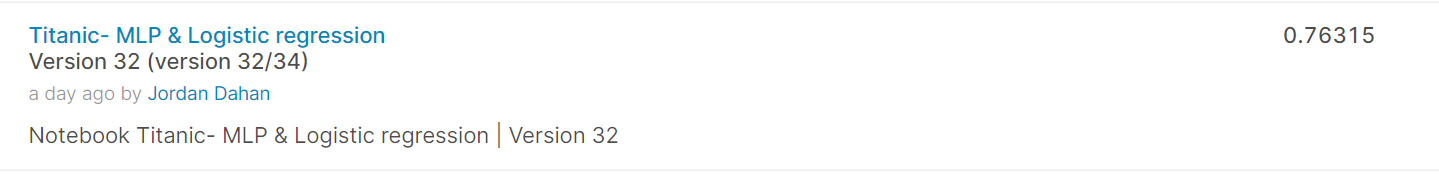
adaBoost model  
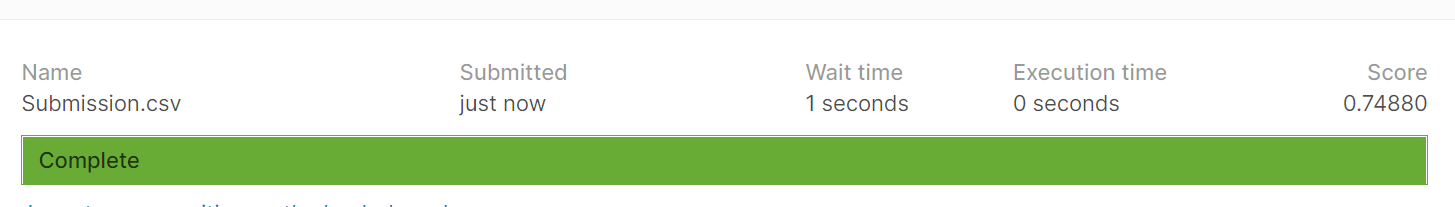

# Conclusion:  

with KNN model I succeeded to make an improvement although my best score were with manually feature selection.  
In training we saw that adaBoost gives amazing results (0.9), but in practice on the test brought relatively low results.  
There is no doubt that the definition of the task fits this model because the model takes into account the neighboring examples - that is, if a group of examples survived it makes sense that the current example would also survive.  

# Sources:  
[Confusion Matrix](https://colab.research.google.com/drive/1lVeHS_IkqDJ3TcnB4Wa4YkiqtDAqxc7A?usp=sharing)  
[Feature Selection,Cross-Validation](https://colab.research.google.com/drive/19qIprMZhayfIjuR3lKFe-N2qD9j3KLwj?usp=sharing)  
[Hyper-Parameters Search,Ensembles,KNN](https://colab.research.google.com/drive/1KbGA4I-bvilaia_6xZwIMabhLGTZTEbx?usp=sharing)


![picture](https://drive.google.com//uc?export=view&id=1ptmVpl-j6JakGSVpWLTdbM0BrIoaHHGW)  
  
**That's it, thanks for your time.**  